# Avocado Price Prediction

## Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

### Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

##### Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 75)
print("Import complete")

Import complete


### Loading Dataset

In [2]:
data = pd.read_csv('avocado.csv') 
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Exploratory Data Analysis

Firstly, will be proceeding with exploratory data analysis and will be analyzing the following:
- General info about the dataset
- missing values 
- analyzing types of variables
  - numerical variables
  - categorical if any
- visualisation 
- detecting outliers
- distributions of variables
- relationship between independent and dependent features

In [3]:
#checking shape of dataset
data.shape

(18249, 14)

In [4]:
# checking information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


observations:
- There are total 1517 record and 14 columns
- There are 11 float variables and 3 object variables
- looks like there are no null values
- Date is categorised as object variable where it should be treated as date-time data type

In [5]:
# checking column names
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
# 'Unnamed: 0' is an unnecessary column so will be dropping it
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
# since date is stored as an object type will be converting it to date-time dataype
data['Date'] = pd.to_datetime(data.Date)
data.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [8]:
# checking datatypes of the variables
data.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [9]:
#checking missing values
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

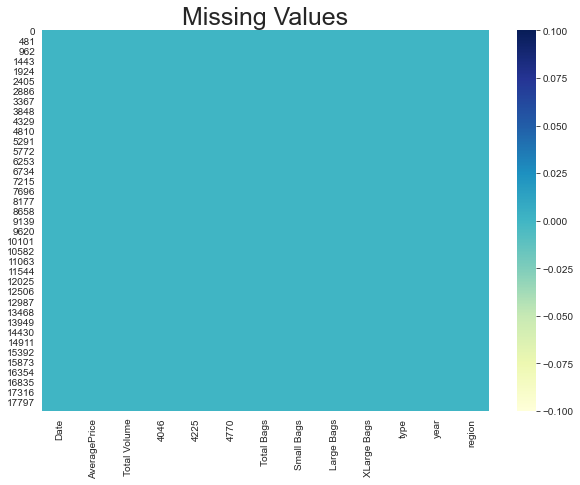

In [10]:
# visualising the missing values 
plt.figure(figsize=(10,7))
plt.title("Missing Values",fontsize=25)
sns.heatmap(data.isnull(),cmap='YlGnBu')
plt.show()

There are no missing values in the dataset.

In [11]:
#checking statistical summary
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


- Average price is normally distributed because mean and median are very close
- There is presence of outliers because there is a lot of difference in the mean and median of other features.
- Max value is far away from 75th percentile which also depicts outliers are present.

In [12]:
# Finding correlation between the variables
correlation = data.corr()
correlation

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


- Major independent features are negatively correlated with target variables
- Can see that there is multicolinearity among the variables i.e. independent variables are highly correlated among each other 

In [13]:
# since Average price is the target variable let's check the correlation of other variables with it
# arranging in the order of highest to lowest
correlation.AveragePrice.sort_values(ascending=False).drop('AveragePrice')

year            0.093197
XLarge Bags    -0.117592
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64

- Year is the highest correlated feature and 4046 is least correlated feature

#### Analysing features types as numerical or categorical 

In [14]:
# for numerical features
numerical_feat = data.select_dtypes(include=['int64','float64'])
numerical_feat

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018


In [15]:
# for categorical features
categorical_feat = data.select_dtypes(include='O')
categorical_feat

,type,region
0,conventional,Albany
1,conventional,Albany
2,conventional,Albany
3,conventional,Albany
4,conventional,Albany
...,...,...
18244,organic,WestTexNewMexico
18245,organic,WestTexNewMexico
18246,organic,WestTexNewMexico
18247,organic,WestTexNewMexico


Analysing types of numerical variables:
    
- Continous
- Discrete

In [16]:
# Analysing discrete variable 

discrete_var = [var for var in numerical_feat.columns if len(numerical_feat[var].unique())<15]
discrete_var

['year']

Year is the only discrete variable

In [17]:
# checking unique values in the year feature
data.year.unique()

array([2015, 2016, 2017, 2018])

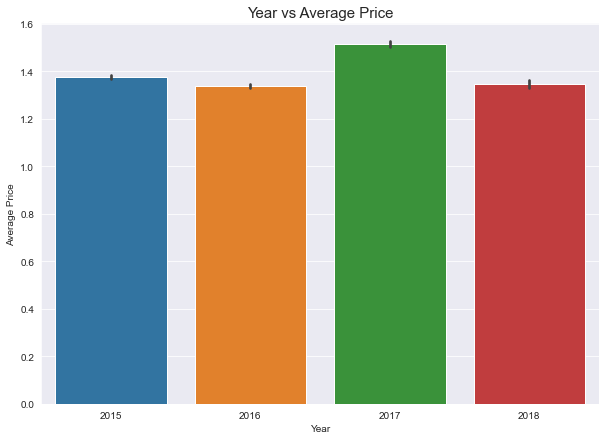

In [18]:
#checking distribution of year
plt.figure(figsize=(10,7))
sns.barplot(x='year',y='AveragePrice',data=data)
plt.title("Year vs Average Price",fontsize=15)
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.show()

The average price of avacados was higher in 2017

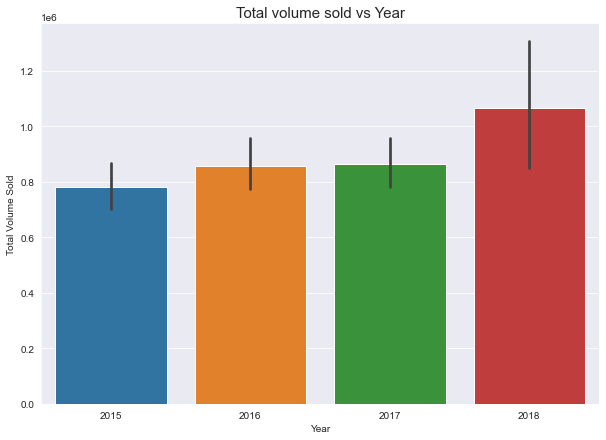

In [19]:
# year vs total volume sold
plt.figure(figsize=(10,7))
sns.barplot(x='year',y='Total Volume',data=data)
plt.title("Total volume sold vs Year",fontsize=15)
plt.xlabel("Year")
plt.ylabel("Total Volume Sold")
plt.show()

The highest volume sold was in 2018 with 2015 being the least.

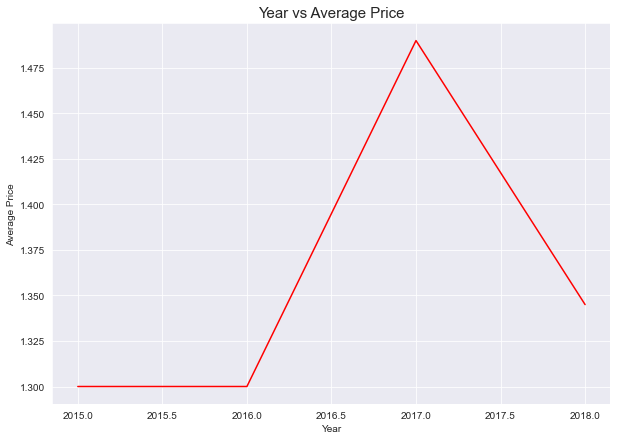

In [20]:
#relationship between target and discrete variable: year
plt.figure(figsize=(10,7))
data.groupby('year')['AveragePrice'].median().plot(color='r')
plt.title("Year vs Average Price",fontsize=15)
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.show()

There was a sisgnificant rise in average price in the year 2016 which went decreased in the year 2017

In [21]:
# Analysing Continous variables

continous_feat = [var for var in numerical_feat.columns if var not in discrete_var]
continous_feat

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']

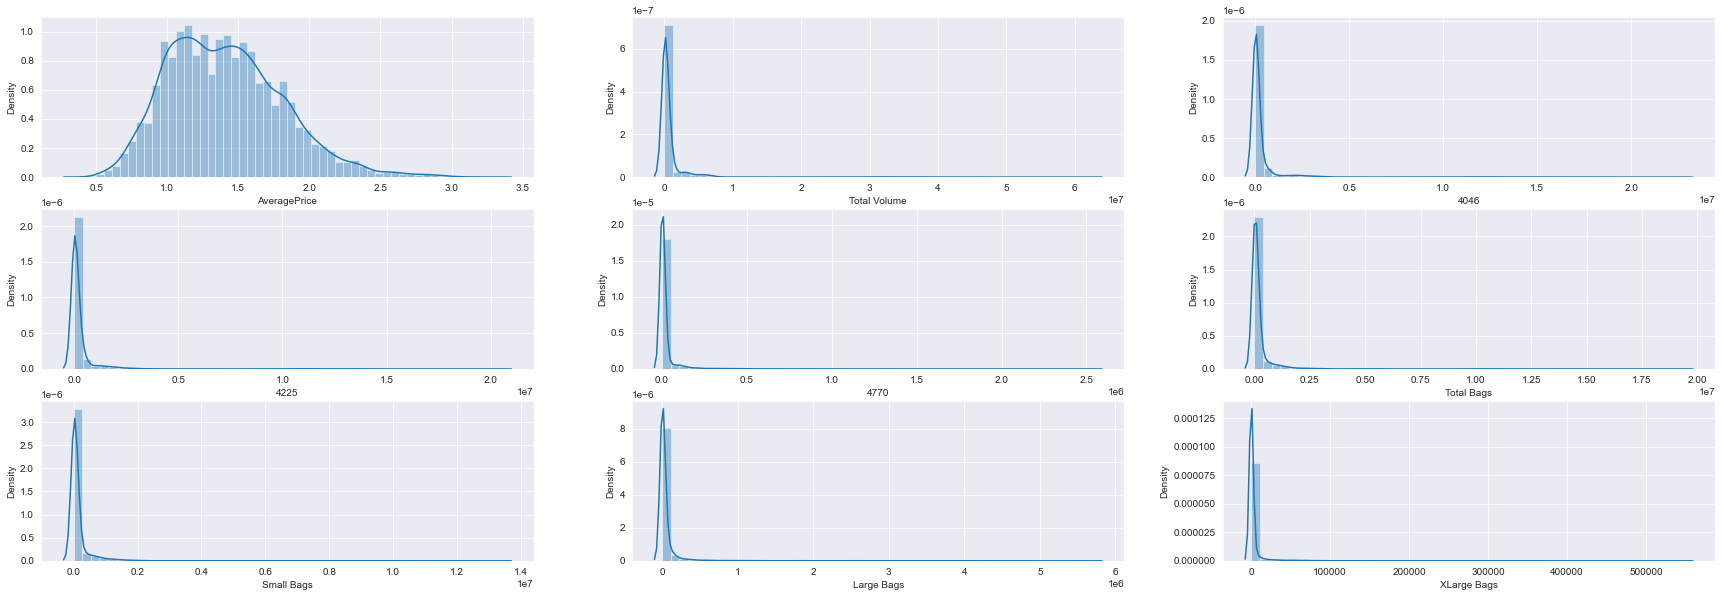

In [22]:
# distribution plots for contionous features
plt.figure(figsize=(30,10))
plot=1
for i in continous_feat:
    plt.subplot(3,3,plot)
    sns.distplot(data[i])
    plot+=1
plt.show()

From visualising the above distribution plots we can infer that :
- Average Price is normally distributed
- All other features are not normally distributed since majorly features are falling in the very first bin which indicates that the they are positively skewed will have to normalise the features further in feature engineering to achieve gaussian distribution for these attributes.

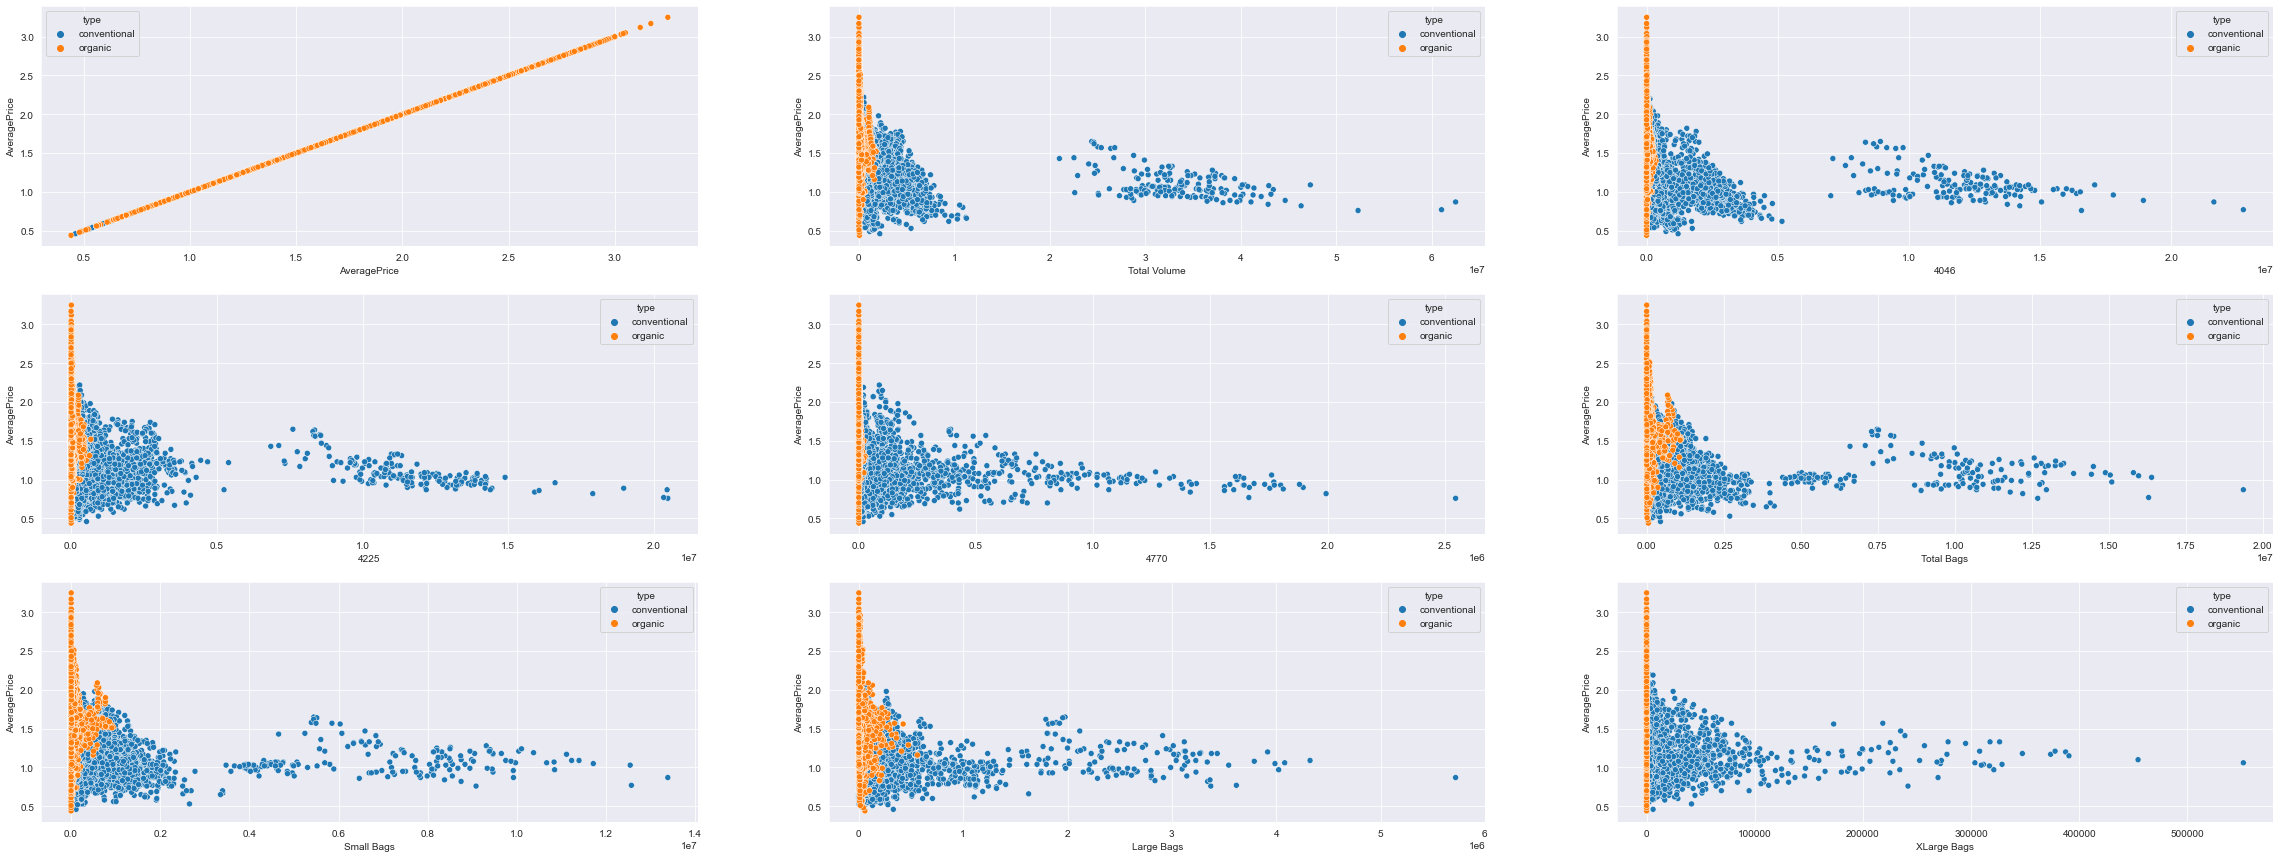

In [23]:
# Relationship between continous variables and average price
plt.figure(figsize=(40,15))
plot=1
for i in continous_feat:
    plt.subplot(3,3,plot)
    sns.scatterplot(data[i],'AveragePrice',hue='type',data=data)
    plot+=1
plt.show()

- From the above plot we can see that organic avocados have more average price than conventional avocados
- There is presence of outliers which majorly belong to convetional types
- There is a somewhat increasing relationship between average prices and continous variables.

Analysing Categorical features

In [24]:
for var in categorical_feat:
    print("{} has {} categories".format(var,len(data[var].unique())))

type has 2 categories
region has 54 categories


In [25]:
#checking unique values in type feature
data.type.unique()

array(['conventional', 'organic'], dtype=object)

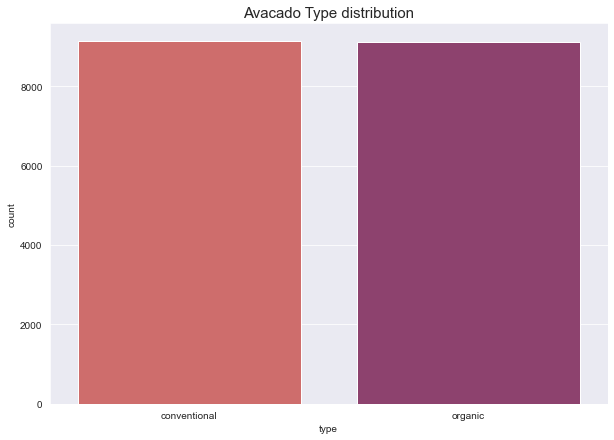

In [26]:
# univariate analysis of type feature
plt.figure(figsize=(10,7))
sns.countplot(data.type,palette='flare')
plt.title("Avacado Type distribution",fontsize=15)
plt.show()

The distribution between the avacado type is equal i.e. organic and conventional are equally distributed.

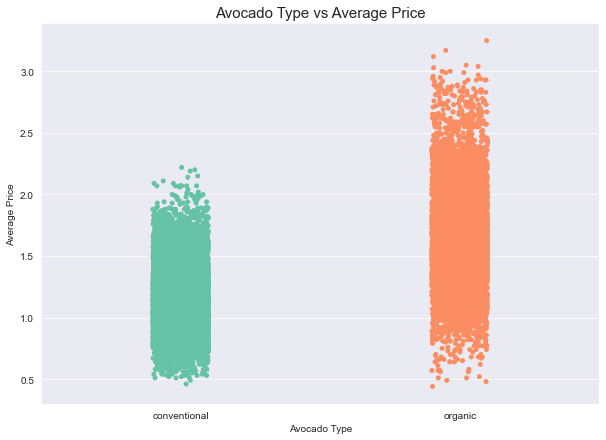

In [27]:
# checking relationship between avocado type and average price
plt.figure(figsize=(10,7))
sns.stripplot(x='type',y='AveragePrice',data=data,palette='Set2')
plt.title("Avocado Type vs Average Price",fontsize=15)
plt.xlabel("Avocado Type")
plt.ylabel("Average Price")
plt.show()

The Average prices are higher for organic avocados, which means conventional avocados are more cheaper then organic.

In [28]:
#checking unique values in region feature
data.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [29]:
# grouping regions with average price
regions=data.groupby('region')['AveragePrice'].mean().sort_values(ascending=False)

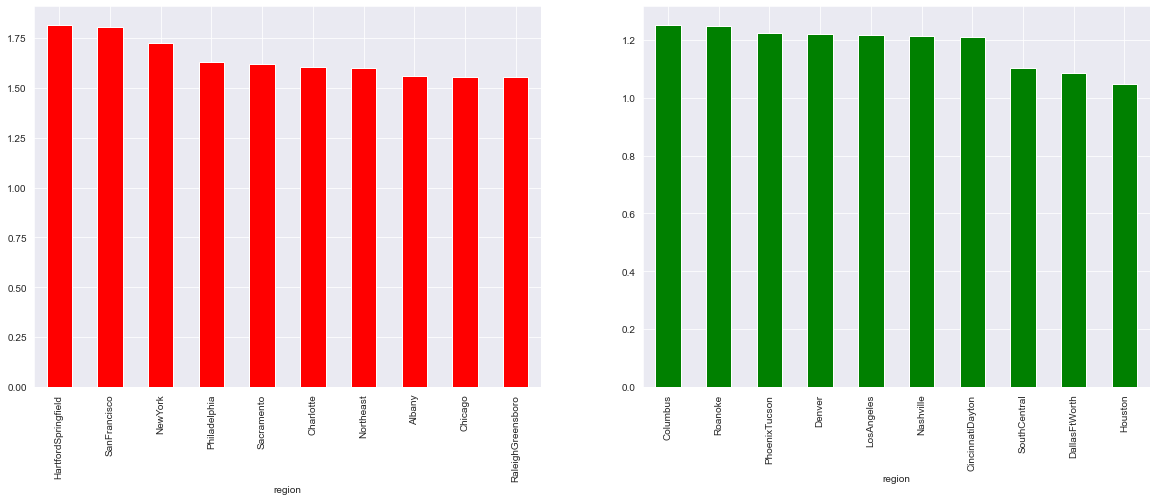

In [30]:
#plotting top10 and bottom 10 regions with respect to average price
top_10_region=regions.iloc[:10]
bottom_10_region=regions.tail(10)

plt.figure(figsize=(20,7))
plt.subplot(121)
top_10_region.plot(kind='bar',color='r')
plt.subplot(122)
bottom_10_region.plot(kind='bar',color='g')
plt.show()

- HartfordSpringfield  has the highest average prices 
- Houston has the least average prices
- Avocados are expensive in regions HartfordSpringfield followed by San Fransico, New York etc.
- Cheap avocados can be found in regions Columbus, Roanoke, PhoenixTucson with Houston being the cheapest

Will be visualising the average price with date and time 

In [31]:
#will be adding a year-month column 
data['year-month']=data.Date.dt.to_period('M')
data.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,year-month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015-12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015-12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015-12


In [32]:
data['day']=pd.DatetimeIndex(data.Date).day
data['month']=pd.DatetimeIndex(data.Date).month
data.drop(['year'],axis=1,inplace=True)
data['year']=pd.DatetimeIndex(data.Date).year

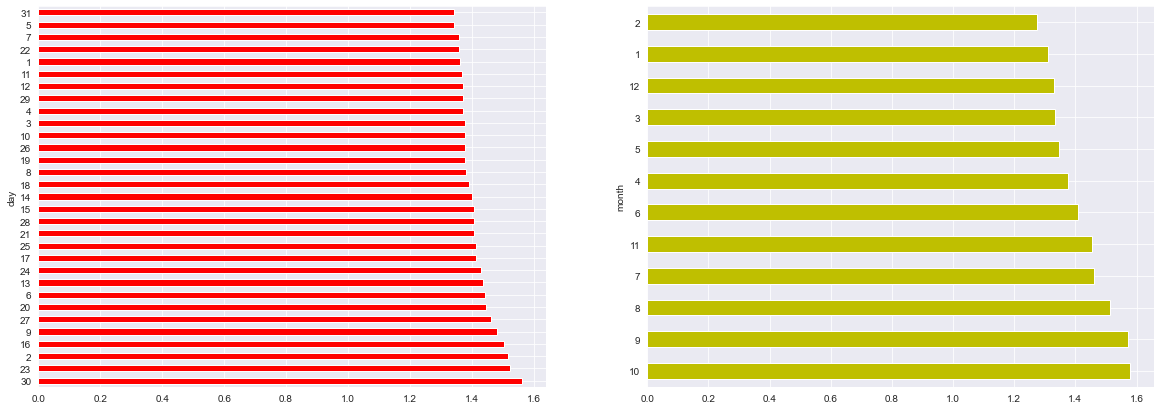

In [33]:
#Average price vs day and month
plt.figure(figsize=(20,7))
plt.subplot(121)
data.groupby('day')['AveragePrice'].mean().sort_values(ascending=False).plot(kind='barh',color='r')
plt.subplot(122)
data.groupby('month')['AveragePrice'].mean().sort_values(ascending=False).plot(kind='barh',color='y')
plt.show()

- Average price of avocados are not fixed for a specific day can vary throughout the month
- Majorly Avocados are expensier in mid-end of the year i.e. october, september, August and so on with October being the most expensive
- And are cheaper in the beginning in the starting months i.e. February, January and so on with Feb being the cheapest

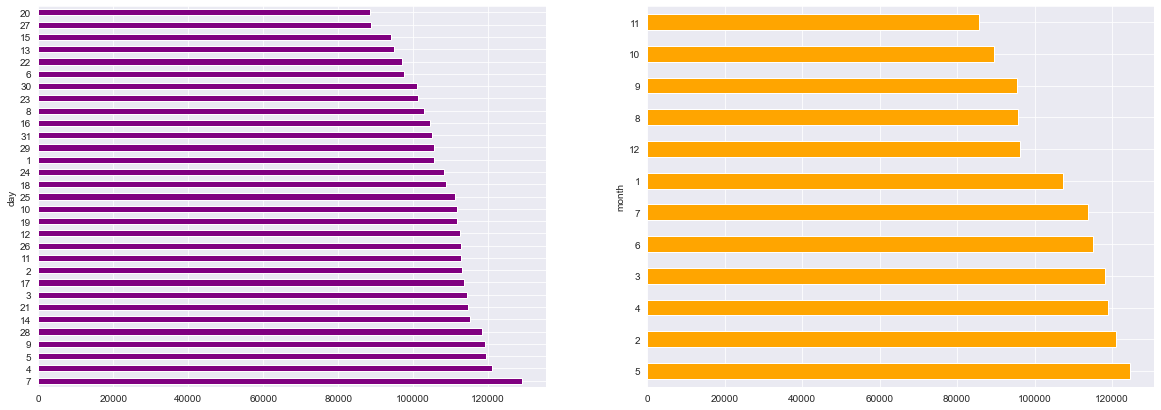

In [34]:
#Total volume sold vs day and month
plt.figure(figsize=(20,7))
plt.subplot(121)
data.groupby('day')['Total Volume'].median().sort_values(ascending=False).plot(kind='barh',color='purple')
plt.subplot(122)
data.groupby('month')['Total Volume'].median().sort_values(ascending=False).plot(kind='barh',color='orange')
plt.show()

- Volume sold is not fixed for a specific day can vary throughout the month
- Majorly avocados are sold in May followed by February, April and so on with November being the least

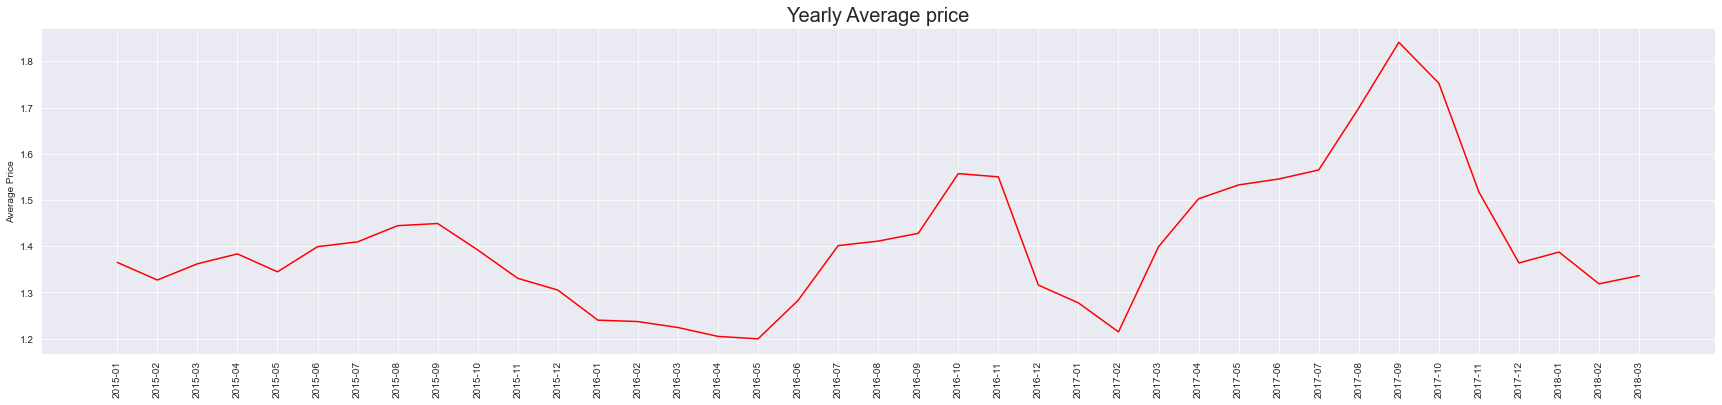

In [35]:
# analysing average price yearly
plt.figure(figsize=(30,6))
plt.title('Yearly Average price',fontsize=20)
group = data.groupby('year-month')['AveragePrice'].mean()
plt.plot(group.index.astype('str'),group,color='r')
plt.xticks(rotation='90')
plt.ylabel('Average Price')
plt.show()

- Average prices dropped in the start of the year 2015
- Average prices spiked little bit in the end of the year 2016
- The average price were majorly higher in the year 2017 
- The prices dropped again at the end of year 2017 and in the beginning of 2018

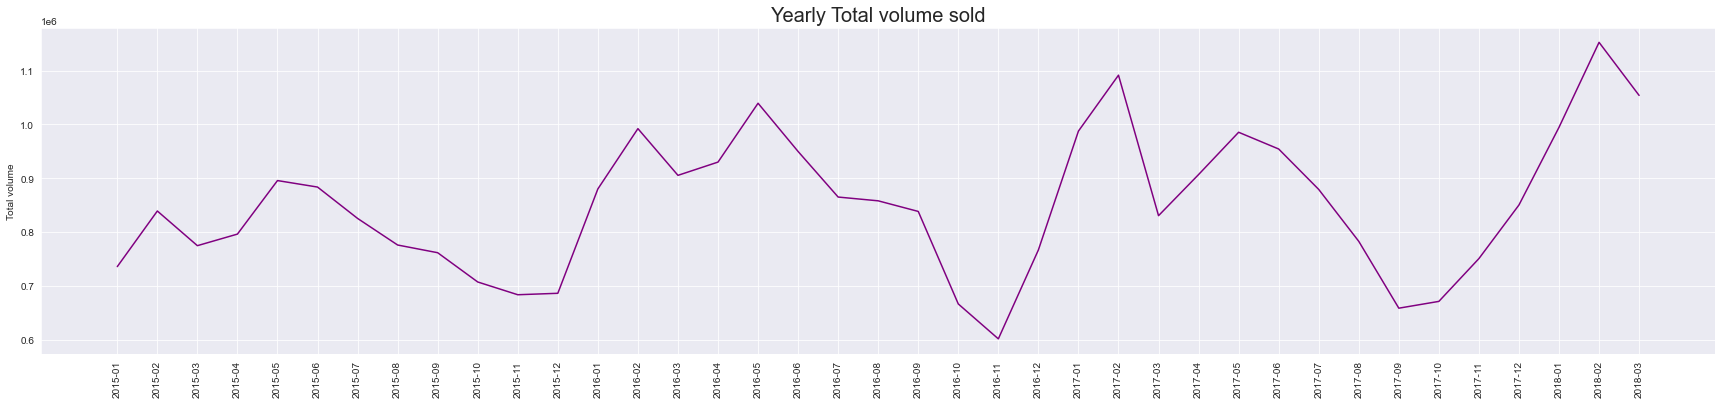

In [36]:
# Yearly total volume sold
plt.figure(figsize=(30,6))
plt.title('Yearly Total volume sold',fontsize=20)
g = data.groupby('year-month')['Total Volume'].mean()
plt.plot(g.index.astype('str'),g,color='purple')
plt.xticks(rotation='90')
plt.ylabel('Total volume')
plt.show()

- Total volume sold spiked in beginning of year 2015 then it went down at the end of the year
- A similar trend as 2015 was observed in 2016 although the spike was more as compared to 2015
- Majorly colume sold was observed in the beggining of year where beginning of 2018 had the highest selling volume

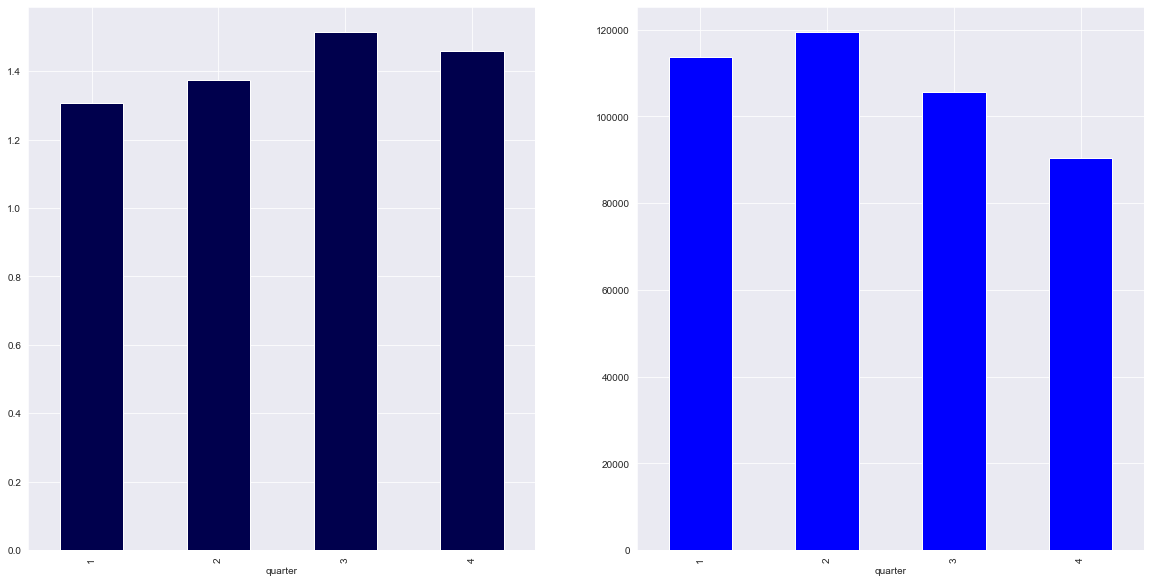

In [37]:
# Average price with respect to quarter of year
data['quarter']=data.Date.dt.quarter
plt.figure(figsize=(20,10))
plt.subplot(121)
data.groupby('quarter')['AveragePrice'].mean().plot(kind='bar',cmap='seismic')
# Total volume sold with respect to quarter of year
plt.subplot(122)
data.groupby('quarter')['Total Volume'].median().plot(kind='bar',cmap='brg')
plt.show()

- Avocados are generally expensier in third quarter
- The highest volume is sold in the second quarter

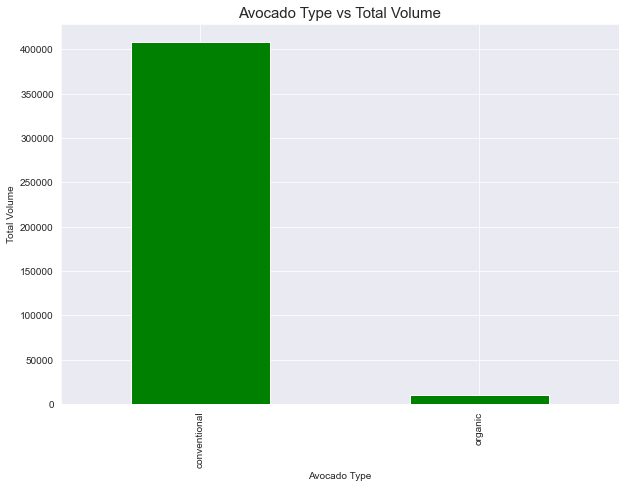

In [38]:
# Type vs Total volume sold
plt.figure(figsize=(10,7))
data.groupby("type")["Total Volume"].median().plot(kind='bar',color='g')
plt.title("Avocado Type vs Total Volume",fontsize=15)
plt.xlabel("Avocado Type")
plt.ylabel("Total Volume")
plt.show()

The above plot tells the relationship between conventional and organic type, which says that conventional type of avocados are sold more than the organic avocados.

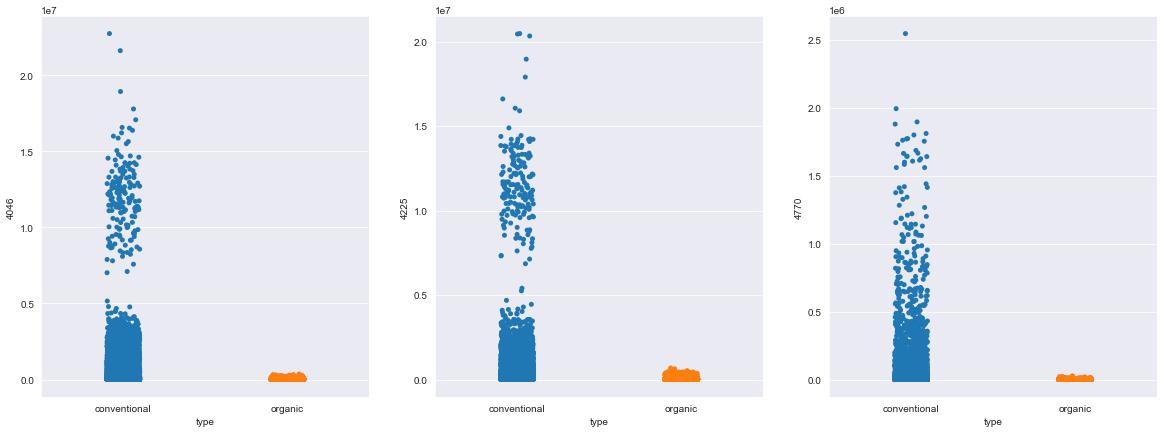

In [39]:
# Types of avocado sold with respect to their product code
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.stripplot(x='type',y='4046',data=data)
plt.subplot(132)
sns.stripplot(x='type',y='4225',data=data)
plt.subplot(133)
sns.stripplot(x='type',y='4770',data=data)
plt.show()

Majorly conventional type is sold more for all the product code 

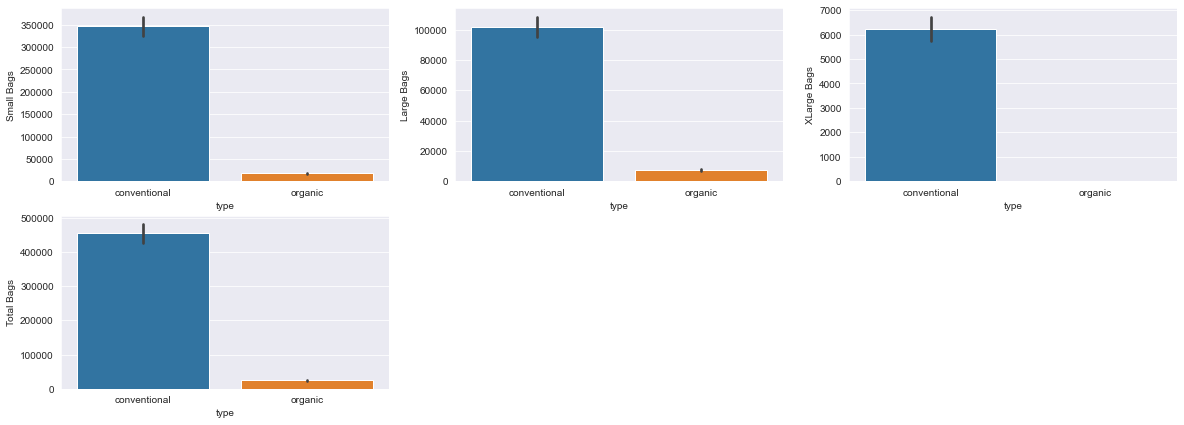

In [40]:
# Types of avocado sold vs bags
plt.figure(figsize=(20,7))
plt.subplot(231)
sns.barplot(x='type',y='Small Bags',data=data)
plt.subplot(232)
sns.barplot(x='type',y='Large Bags',data=data)
plt.subplot(233)
sns.barplot(x='type',y='XLarge Bags',data=data)
plt.subplot(234)
sns.barplot(x='type',y='Total Bags',data=data)
plt.show()

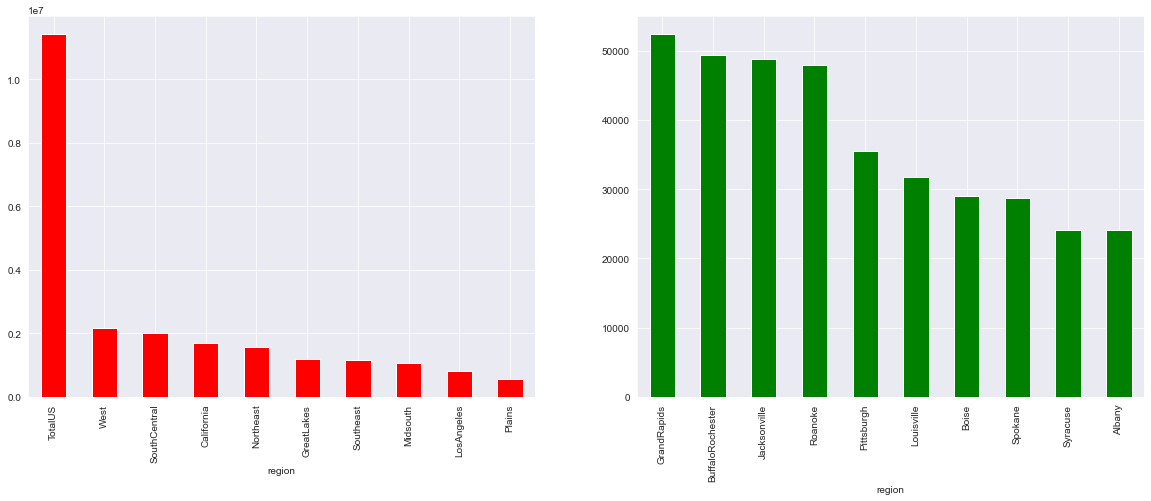

In [41]:
# regions vs Total volume
region_sold=data.groupby('region')['Total Volume'].median().sort_values(ascending=False)
top_10_region_sold=region_sold.iloc[0:10]
bottom_10_region_sold=region_sold.tail(10)

plt.figure(figsize=(20,7))
plt.subplot(121)
top_10_region_sold.plot(kind='bar',color='r')
plt.subplot(122)
bottom_10_region_sold.plot(kind='bar',color='g')
plt.show()

- Avocados are majorly found in United States followed by West, South Central, California
- Avocados are less found and sold in Grand Rapids, Buffalo Rochester, Jacksonville with Albany being the least selling region

In [42]:
# creating a new column revenue generated 
data['Total Revenue'] = data['AveragePrice'] * data['Total Volume']

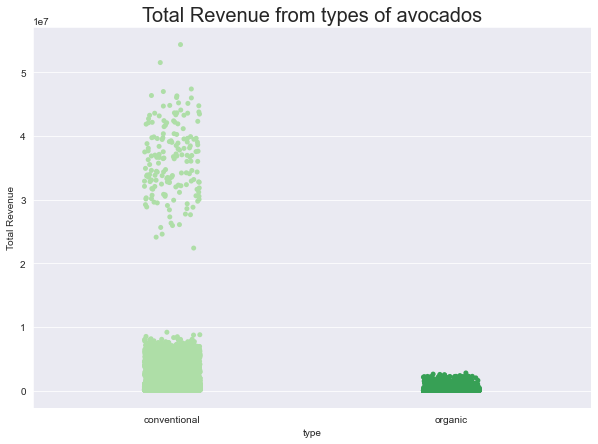

In [43]:
#total revenue from types of avocados
plt.figure(figsize=(10,7))
plt.title('Total Revenue from types of avocados',fontsize=20)
sns.stripplot(x='type',y='Total Revenue',data=data,palette='Greens')
plt.show()

Major revenue is generated from conventional type of avocados

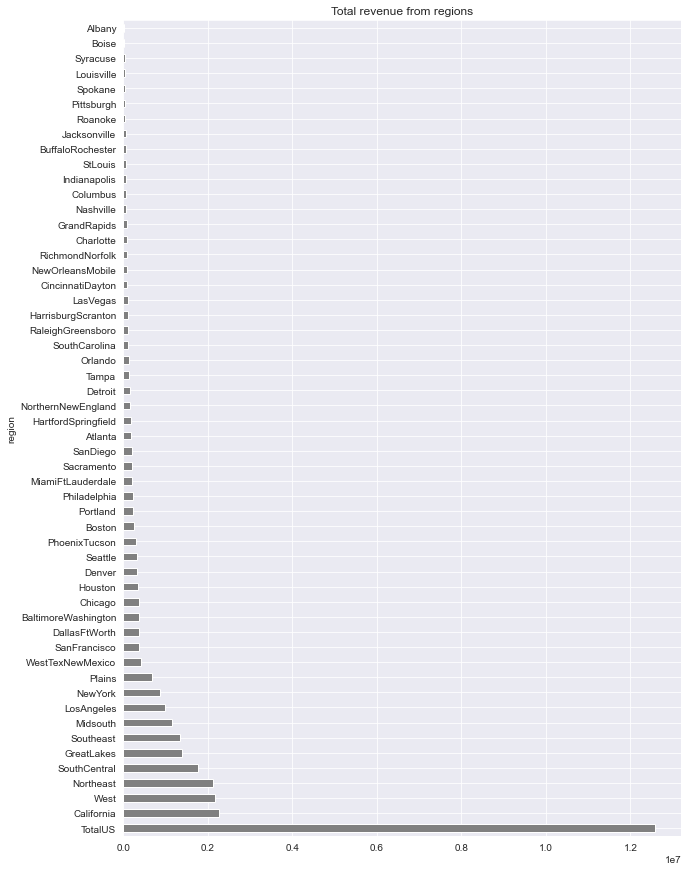

In [44]:
# regions generating total revenue
plt.figure(figsize=(10,15))
plt.title('Total revenue from regions')
data.groupby('region')['Total Revenue'].median().sort_values(ascending=False).plot.barh(color='grey')
plt.show()

- The highest revenue comes from United States
- Albany generates least revenue among all other regions

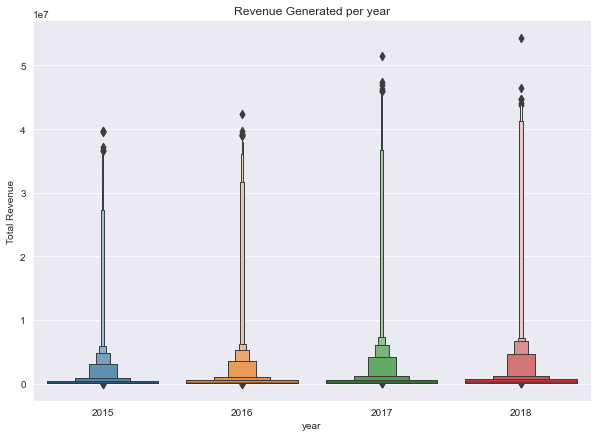

In [45]:
# Revenue vs year 
plt.figure(figsize=(10,7))
plt.title('Revenue Generated per year')
sns.boxenplot(x='year',y='Total Revenue',data=data)
plt.show()

Major revenue is made in the year 2017 and 2015 being the least

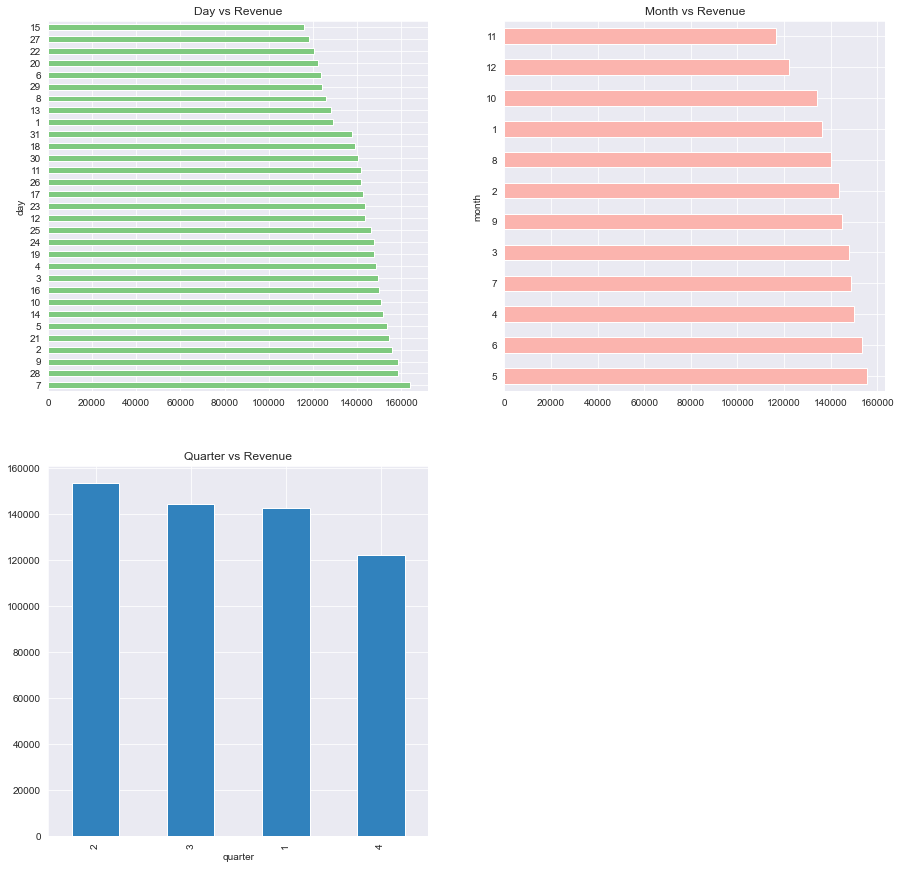

In [46]:
# Revenue analysis with date and time
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title('Day vs Revenue')
data.groupby('day')['Total Revenue'].median().sort_values(ascending=False).plot(kind='barh',cmap='Accent')
plt.subplot(222)
plt.title('Month vs Revenue')
data.groupby('month')['Total Revenue'].median().sort_values(ascending=False).plot(kind='barh',cmap='Pastel1')     
plt.subplot(223)
plt.title('Quarter vs Revenue')
data.groupby('quarter')['Total Revenue'].median().sort_values(ascending=False).plot(kind='bar',cmap='tab20c')
plt.show()

- Cannot specifically say about revenue for days as it can vary for different days in a month
- Major revenue is generated in the month of May and June
- In the second qaurter of the year major revenue is generated with fourth quarter being the least

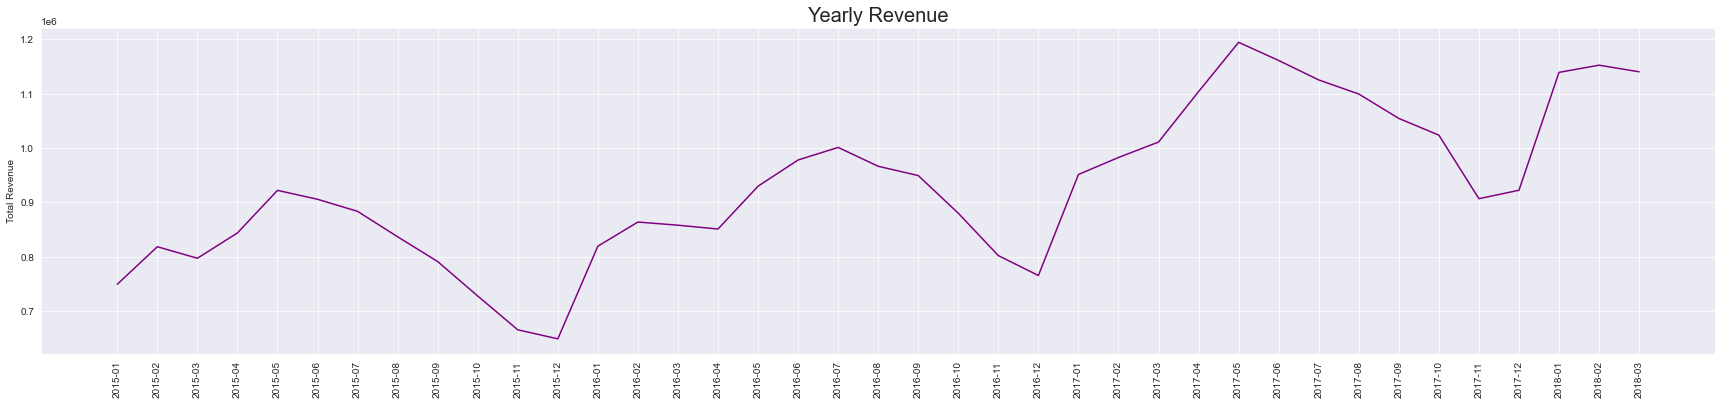

In [47]:
# Revenue made yearly
plt.figure(figsize=(30,6))
plt.title('Yearly Revenue',fontsize=20)
rev = data.groupby('year-month')['Total Revenue'].mean()
plt.plot(rev.index.astype('str'),rev,color='purple')
plt.xticks(rotation='90')
plt.ylabel('Total Revenue')
plt.show()

- Total revenue spiked in start of the year 2015 and went down in the end 
- Same trend followed in the year 2016 
- The revenue spiked the highest in year 2017 in mid of year but didn't decrease much as compared to the other years, 2017 experienced the highest revenue
- Majorly revenue goes down in the end of the year

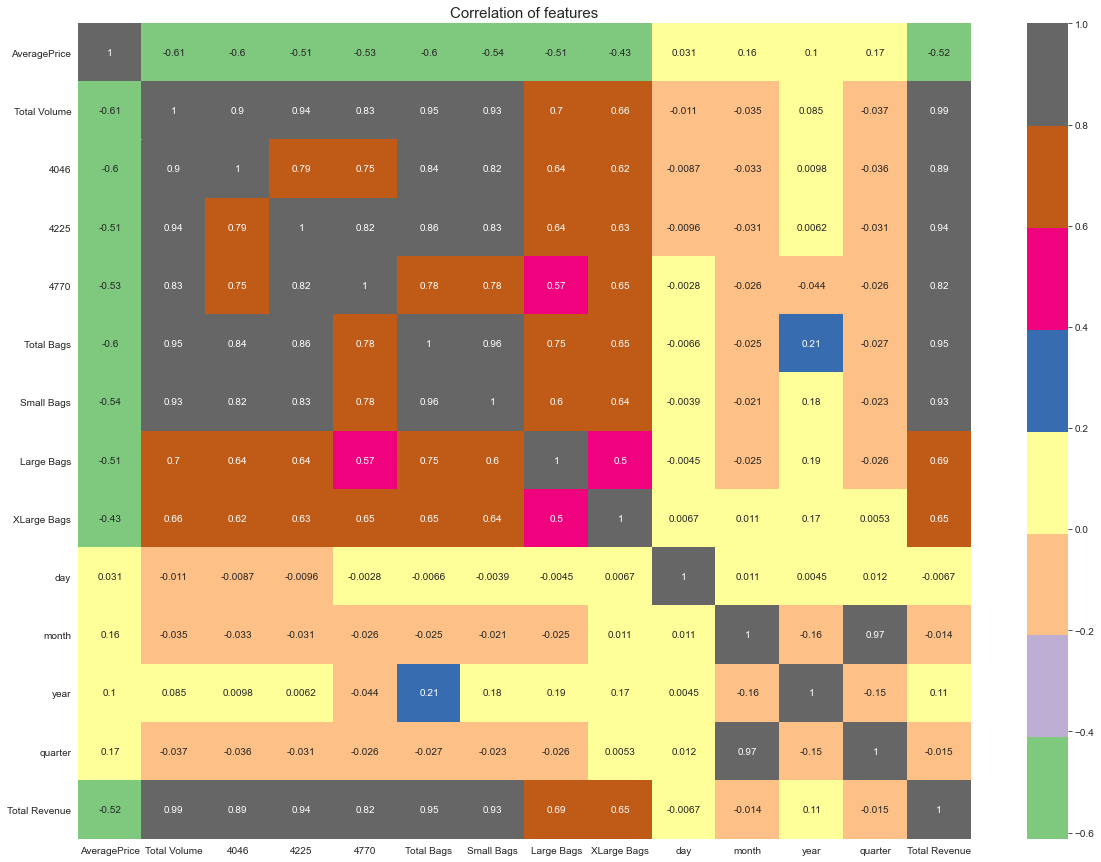

In [48]:
#checking correlation of variables using spearman method for ordinal variables
corr = data.corr(method='spearman')
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap='Accent')
plt.title('Correlation of features',fontsize=15)
plt.show()

From the above correlation plot we can see that there is high magnitude of correlation between the independent variables which results in multicollinearity.

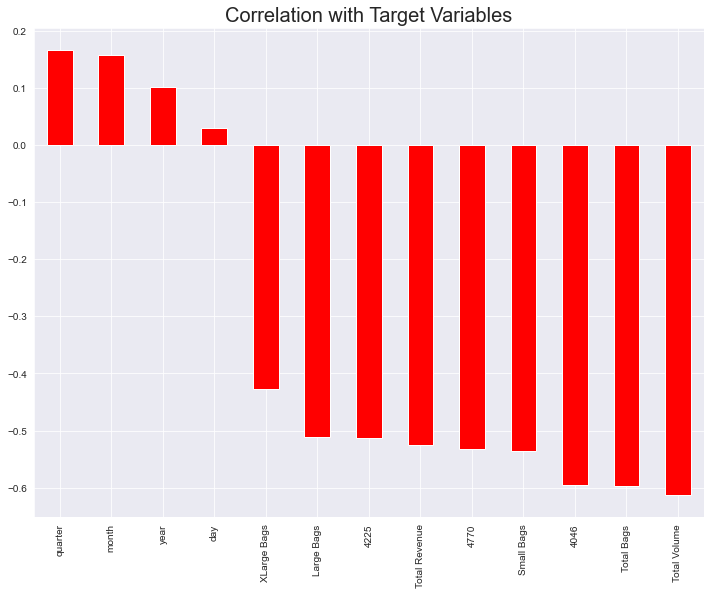

In [49]:
# will be plotting correlation with respect to target variable "Average Prices"
plt.figure(figsize=(12,9))
plt.title("Correlation with Target Variables",fontsize=20)
corr.AveragePrice.sort_values(ascending=False).drop(['AveragePrice']).plot.bar(color='r')
plt.show()

From the above plot we can see that quarter has the highest correlation and Total Volume has the least but highly negatively related to the target variable.

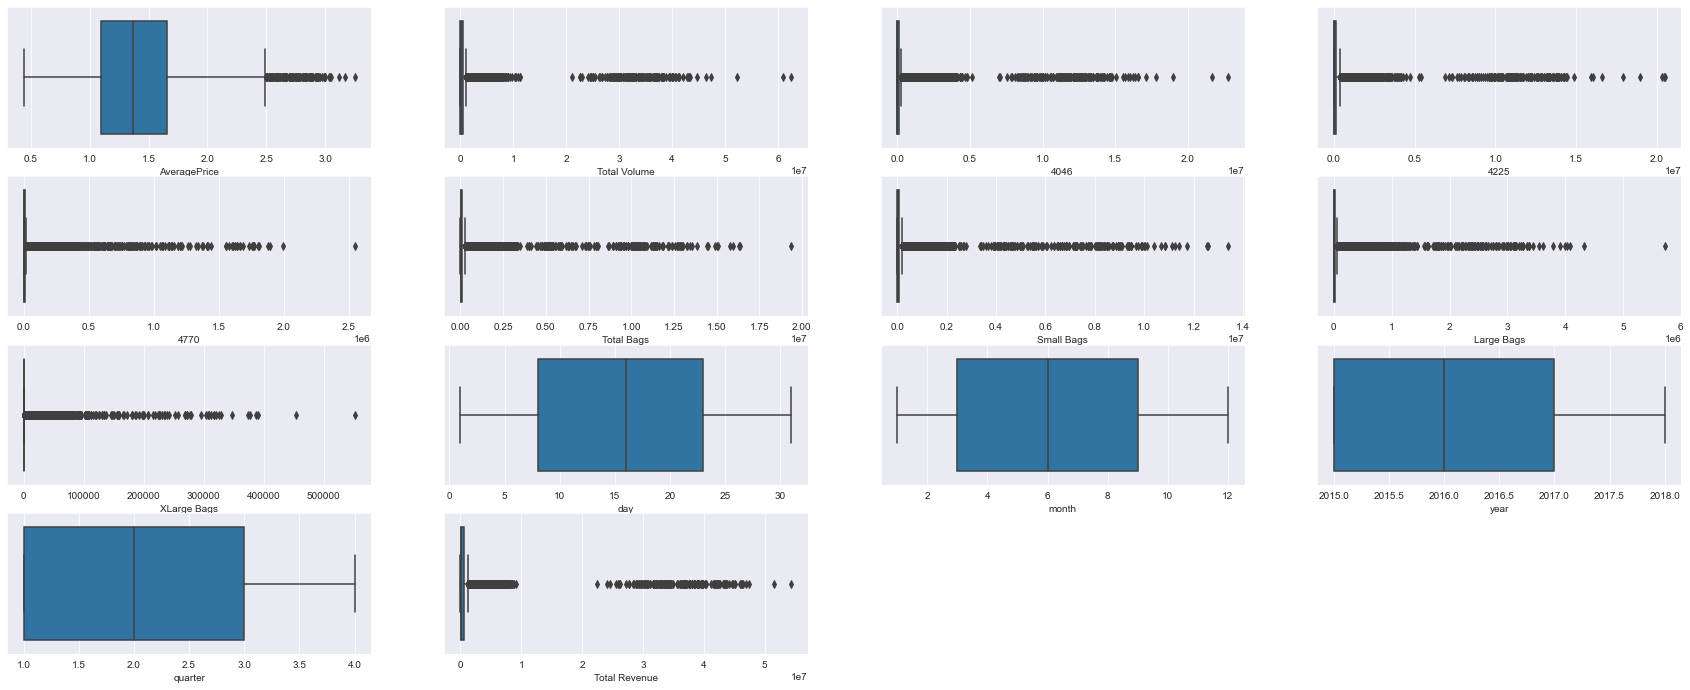

In [50]:
# visualising outliers sing box plot
di = data.select_dtypes(exclude=['O','datetime64[ns]','period[M]'])
plot = 1
plt.figure(figsize=(30,15))
for var in di.columns:
    plt.subplot(5,4,plot)
    sns.boxplot(di[var])
    plot +=1
plt.show()

From the boxplots we can visualise that there is a presence of outliers in most of the features, mostly outliers are present above the upper bound whisker, since there are a large number of outliers and from previous visualisation we saw that conventional type is contributing to number of outliers so we cannot remove outliers we will have to replace them instead. 
List of features having outliers:
- Average price
- Total Volume
- 4046
- 4225
- 4770
- Total Bags
- Small bags 
- Large Bags
- XLarge Bags
- Total Revenue

### Feature Engineering

Will be proceeding with Feature Engineering:

Feature engineering basically focuses on:

- Imputation of missing values : Since we don't have missing values we won't have to perform this step
- Transformation : Transforming the not normally distributed variables
- Treating outliers :  will be treating them by replacing
- Handling categorical variables
- Scaling : Normalisation or Standardisation

#### Transformation 

- Will be checking the gaussian distribution of the variables using histograms and Q-Q plot
- Will be checking the skewness
- Will be applying different transformations to normalise the variables

In [51]:
dataset = data.copy()

In [52]:
# function to plot distribution and Q_Q plot
import scipy.stats as stat
import pylab
def plot_data(df,var):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[var].hist()
    plt.xlabel(var)
    plt.subplot(1,2,2)
    stat.probplot(df[var],dist='norm',plot=pylab)

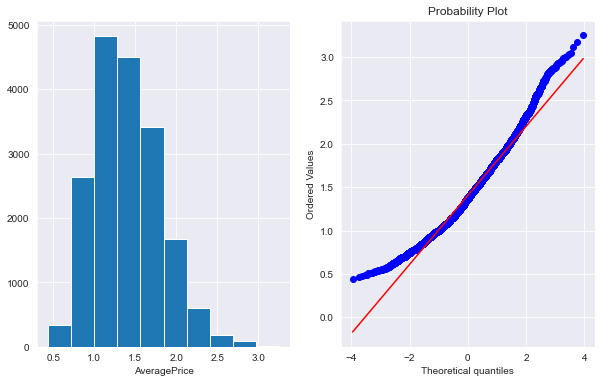

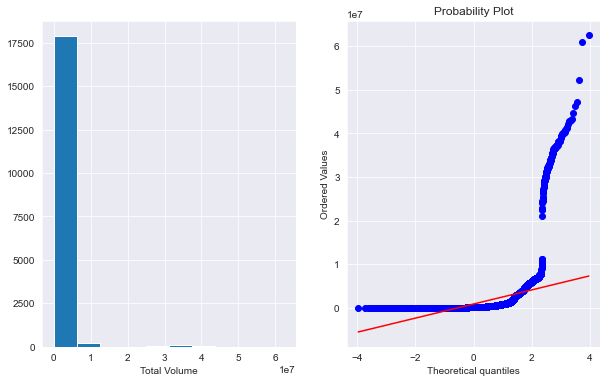

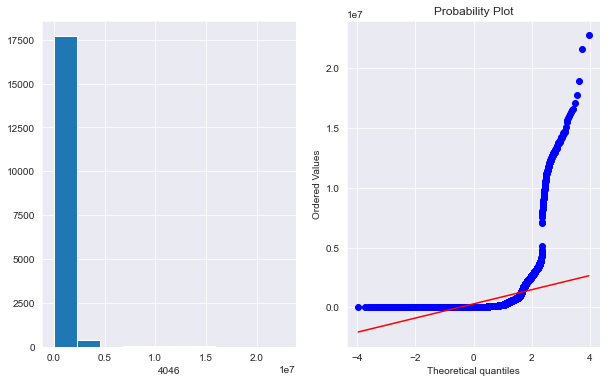

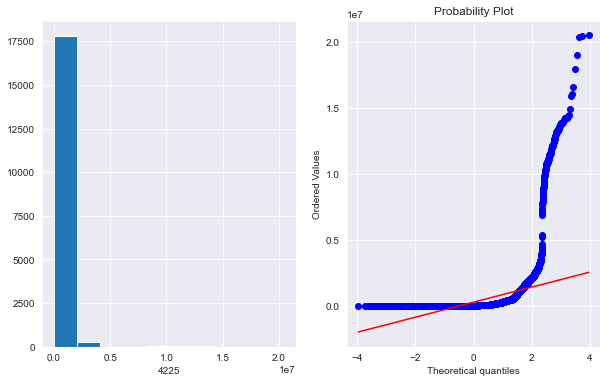

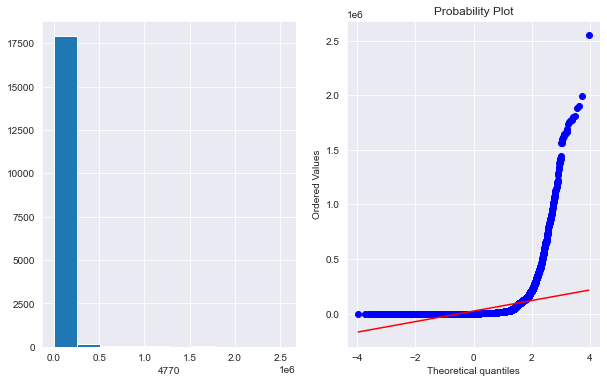

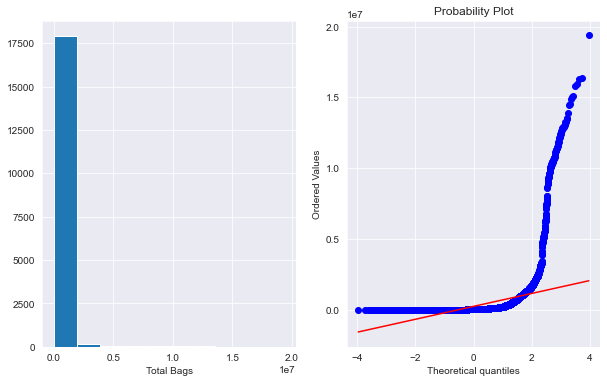

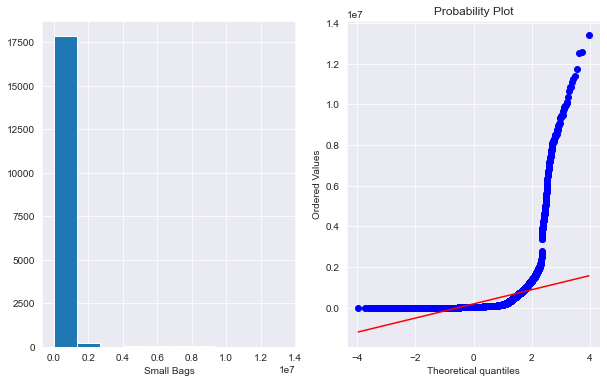

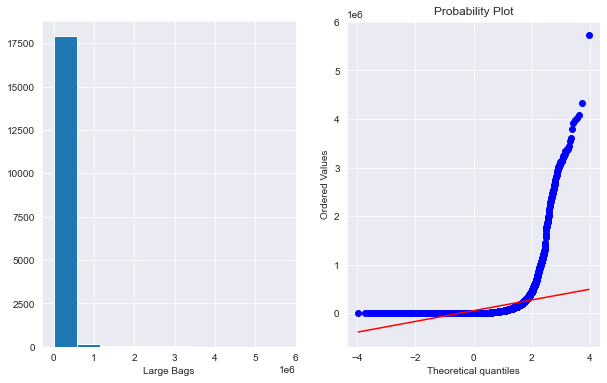

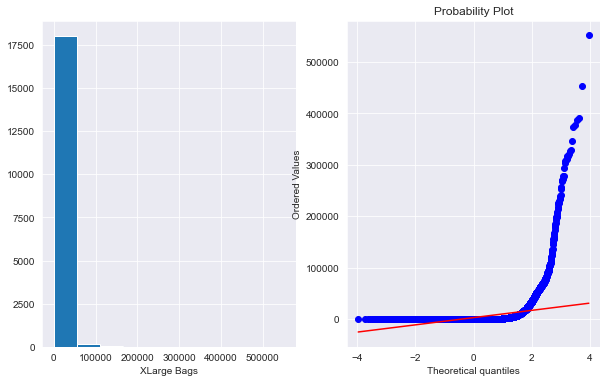

In [53]:
for var in continous_feat:
    plot_data(dataset,var)
plt.show()

- In the above plots we can see the distribution of data with the help of histogram and the Q-Q plot indicates if the data is normally distributed or not. 
- If the values follow the straight lines the data is normally distributed else it is not.

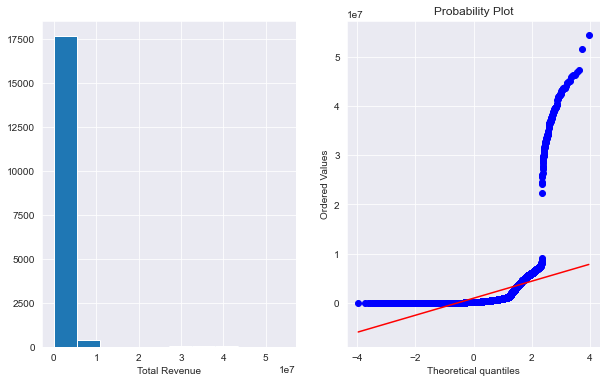

In [54]:
# since added Total revenue later in the dataset checking its distribuion as well
plot_data(dataset,'Total Revenue')

In [55]:
# columns to normalise
cols_to_normalise=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','Total Revenue'] 

In [56]:
# applying log transformation 
for i in cols_to_normalise:
    dataset[i]=np.log(dataset[i]+ 1)

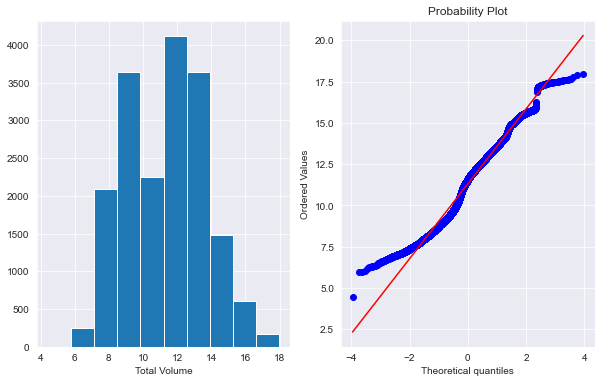

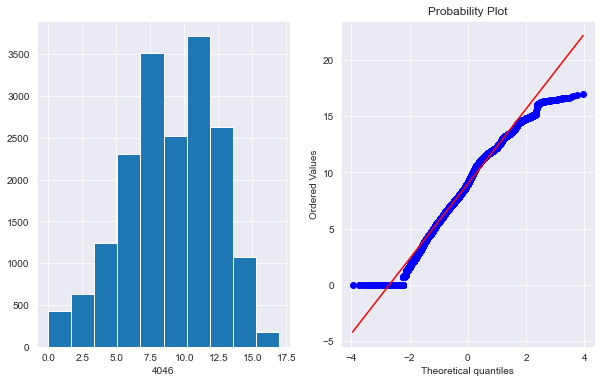

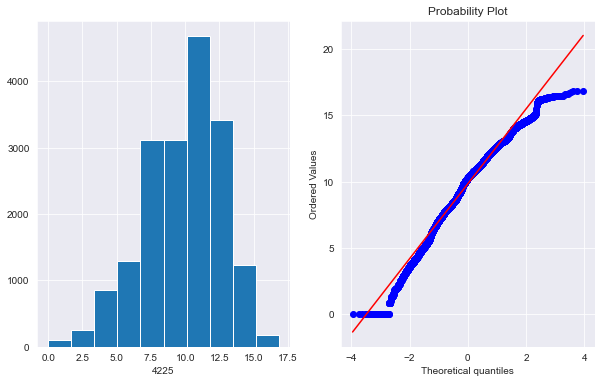

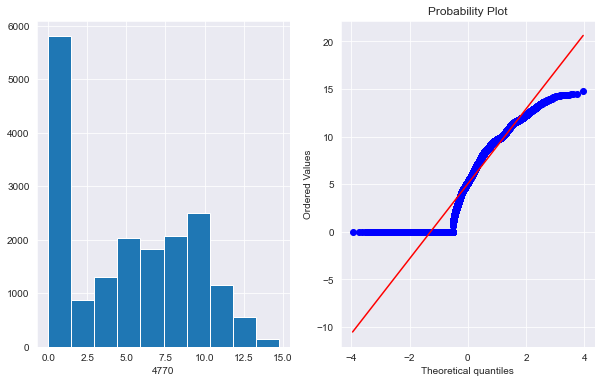

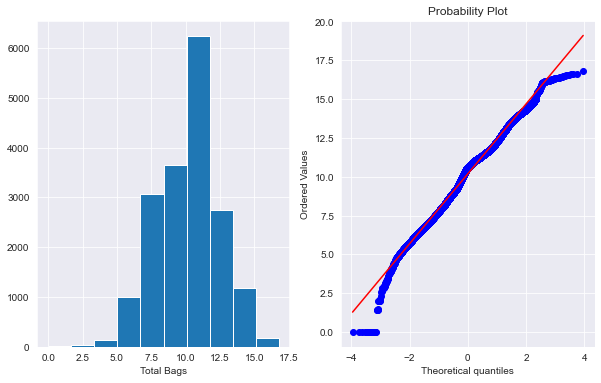

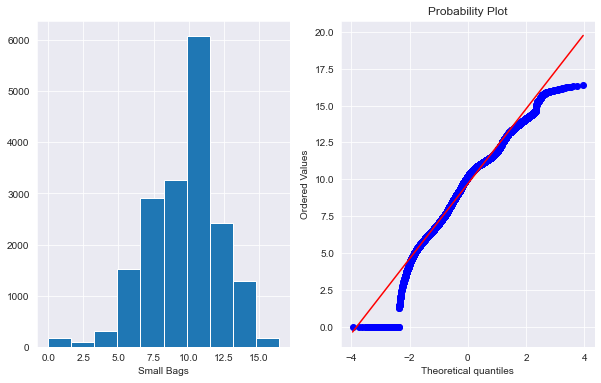

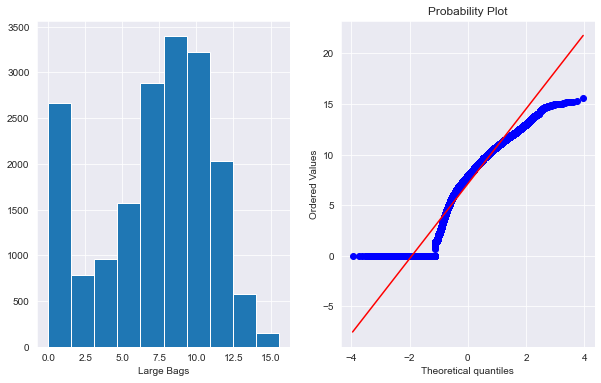

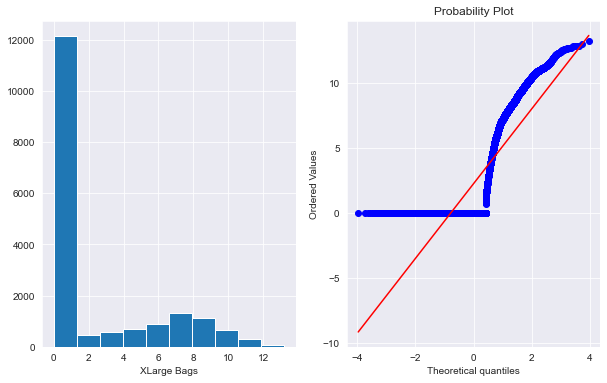

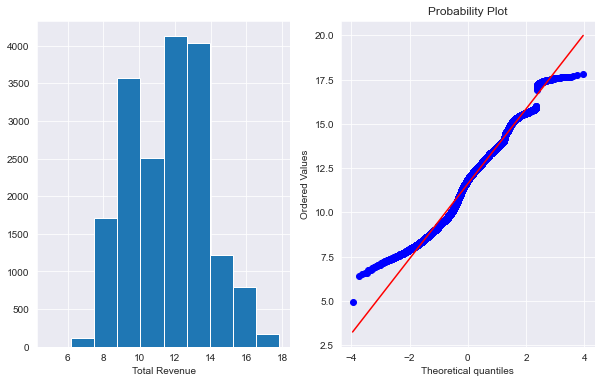

In [57]:
# plotting the histogram and Q-Qplot
for j in cols_to_normalise:
    plot_data(dataset,j)
plt.show()

Will be checking skewness for further details on normalised features

In [58]:
dataset.skew()

AveragePrice     0.580303
Total Volume     0.088098
4046            -0.328195
4225            -0.486654
4770             0.099986
Total Bags      -0.218874
Small Bags      -0.622148
Large Bags      -0.547765
XLarge Bags      1.176494
day              0.014310
month            0.106617
year             0.215339
quarter          0.110514
Total Revenue    0.102463
dtype: float64

Small Bags and Large Bags have higher skewed data so will normalise them 

In [59]:
# Small Bags, XLarge Bags are skewed more than 0.5 and less than -0.5
dataset['Small Bags'] = np.power(dataset['Small Bags'],2) # applying power transfromation since -ve skewed.  
dataset['XLarge Bags'] = np.log(dataset['XLarge Bags']+1) # applying log transformation since +ve skwewed

In [60]:
dataset.skew()

AveragePrice     0.580303
Total Volume     0.088098
4046            -0.328195
4225            -0.486654
4770             0.099986
Total Bags      -0.218874
Small Bags       0.312461
Large Bags      -0.547765
XLarge Bags      0.840536
day              0.014310
month            0.106617
year             0.215339
quarter          0.110514
Total Revenue    0.102463
dtype: float64

In [61]:
dataset['XLarge Bags'] = np.cbrt(dataset['XLarge Bags']) # applying cube root transformation since skewness more than 0.5          

In [62]:
dataset.skew()

AveragePrice     0.580303
Total Volume     0.088098
4046            -0.328195
4225            -0.486654
4770             0.099986
Total Bags      -0.218874
Small Bags       0.312461
Large Bags      -0.547765
XLarge Bags      0.704306
day              0.014310
month            0.106617
year             0.215339
quarter          0.110514
Total Revenue    0.102463
dtype: float64

#### Treating Outliers

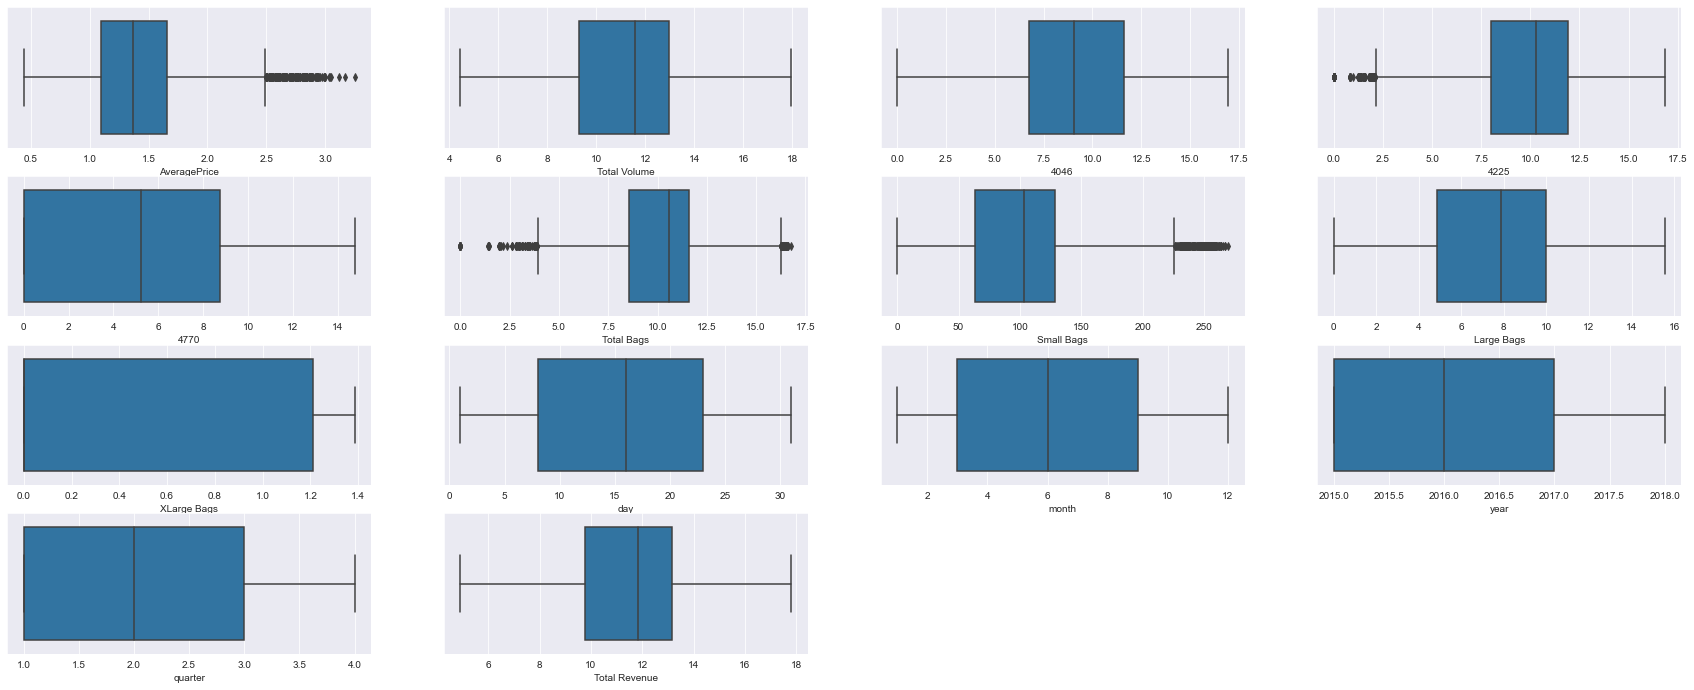

In [63]:
#checking outliers 
dx = dataset.select_dtypes(exclude=['O','datetime64[ns]','period[M]'])
plot = 1
plt.figure(figsize=(30,15))
for var in dx.columns:
    plt.subplot(5,4,plot)
    sns.boxplot(dx[var])
    plot +=1
plt.show()

In [64]:
# defining a function to find the lower and upper bound 
def outliers(df,var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3-Q1
    outliers_step = 1.5*IQR 
    
    lower = Q1 - outliers_step
    upper = Q3 + outliers_step
    return lower,upper

In [65]:
DF=dataset.copy()
# replacing outliers with the median
outlier_cols=['AveragePrice','Total Volume','4046', '4225', '4770','Total Bags','Small Bags', 'Large Bags','Total Revenue']    
for var in outlier_cols:
    lower_bound,upper_bound=outliers(DF,outlier_cols)
    DF[outlier_cols]=np.where(DF[outlier_cols]<lower_bound,DF[outlier_cols].median(),DF[outlier_cols])
    DF[outlier_cols]=np.where(DF[outlier_cols]>upper_bound,DF[outlier_cols].median(),DF[outlier_cols])

#since XLarge Bags have 0 as median so will not be replacing it with median
lower_bound,upper_bound=outliers(DF,'XLarge Bags')
DF['XLarge Bags']=np.where(DF['XLarge Bags']<lower_bound,lower_bound,DF['XLarge Bags'])
DF['XLarge Bags']=np.where(DF['XLarge Bags']>upper_bound,upper_bound,DF['XLarge Bags'])

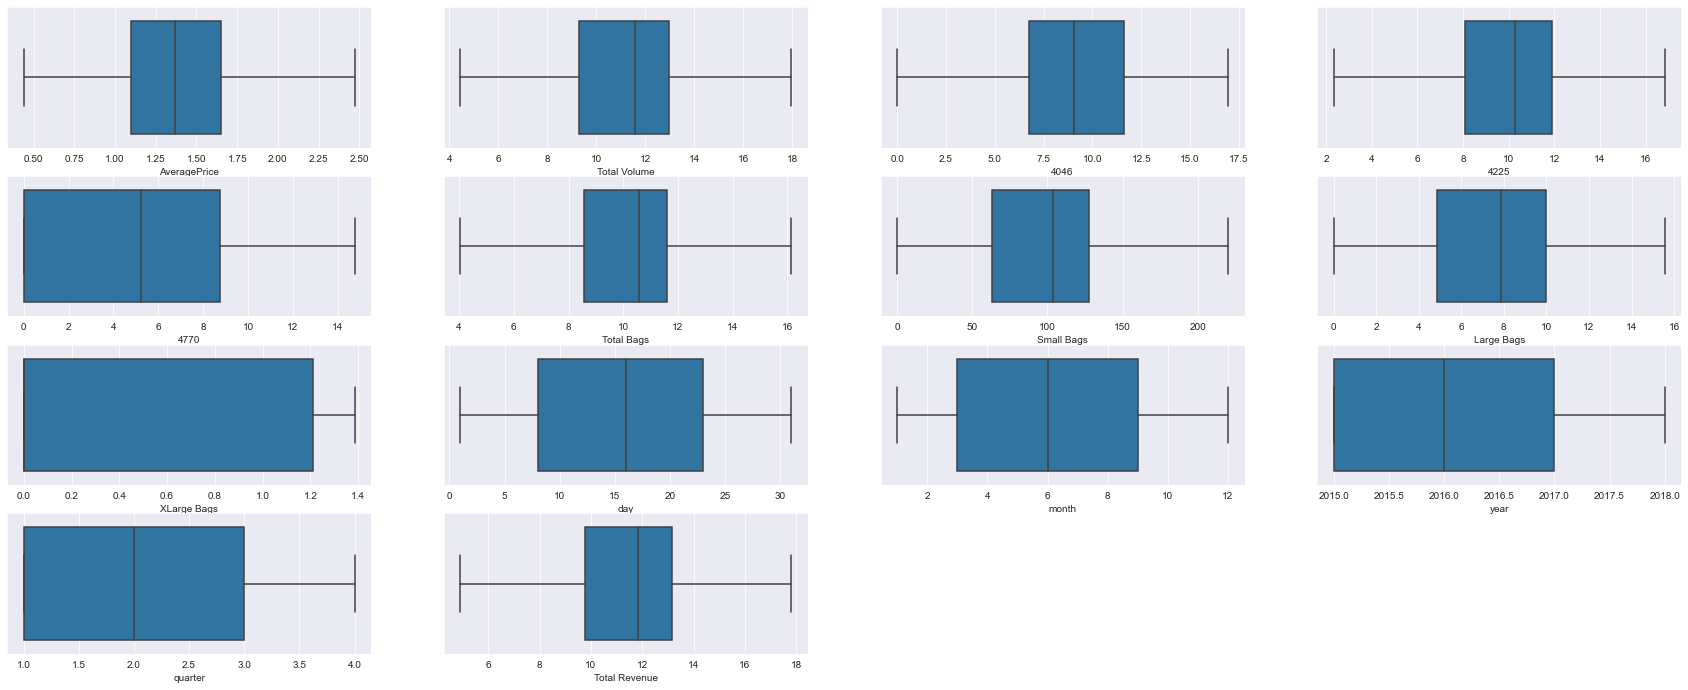

In [66]:
# visualising if the outliers have been replaced or not
dx1 = DF.select_dtypes(exclude=['O','datetime64[ns]','period[M]'])
plot = 1
plt.figure(figsize=(30,15))
for var in dx1.columns:
    plt.subplot(5,4,plot)
    sns.boxplot(dx1[var])
    plot +=1
plt.show()

#### Handling categorical features

In [67]:
categorical_feat

,type,region
0,conventional,Albany
1,conventional,Albany
2,conventional,Albany
3,conventional,Albany
4,conventional,Albany
...,...,...
18244,organic,WestTexNewMexico
18245,organic,WestTexNewMexico
18246,organic,WestTexNewMexico
18247,organic,WestTexNewMexico


In [68]:
DF=dataset.copy()
DF.type.nunique(),DF.region.nunique()

(2, 54)

There are two categorical features type and region, type has two categories and region has 54 categories

In [69]:
#encoding region feature 
data_encoded = pd.get_dummies(data=DF,columns=['region','type'])
data_encoded

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year-month,day,month,year,quarter,Total Revenue,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_conventional,type_organic
0,2015-12-27,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,82.084588,4.545951,0.0,2015-12,27,12,2015,4,11.355519,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2015-12-20,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,83.712058,4.589955,0.0,2015-12,20,12,2015,4,11.212967,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2015-12-13,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,80.866559,4.645736,0.0,2015-12,13,12,2015,4,11.607743,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2015-12-06,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,74.726080,4.903495,0.0,2015-12,6,12,2015,4,11.354077,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2015-11-29,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,75.644578,5.291746,0.0,2015-11,29,11,2015,4,11.087232,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,89.830740,6.070391,0.0,2018-02,4,2,2018,1,10.233977,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
18245,2018-01-28,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,82.781013,5.786284,0.0,2018-01,28,1,2018,1,10.075319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
18246,2018-01-21,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,83.602331,3.768384,0.0,2018-01,21,1,2018,1,10.155990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
18247,2018-01-14,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,86.460256,3.931826,0.0,2018-01,14,1,2018,1,10.350641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [70]:
#will be dropping some columns of date and time since we have extracted the day month and year already
data_encoded.drop(['Date','year-month'],axis=1,inplace=True)
data_encoded

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,day,month,year,quarter,Total Revenue,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_conventional,type_organic
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,82.084588,4.545951,0.0,27,12,2015,4,11.355519,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,83.712058,4.589955,0.0,20,12,2015,4,11.212967,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,80.866559,4.645736,0.0,13,12,2015,4,11.607743,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,74.726080,4.903495,0.0,6,12,2015,4,11.354077,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,75.644578,5.291746,0.0,29,11,2015,4,11.087232,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,89.830740,6.070391,0.0,4,2,2018,1,10.233977,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
18245,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,82.781013,5.786284,0.0,28,1,2018,1,10.075319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
18246,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,83.602331,3.768384,0.0,21,1,2018,1,10.155990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
18247,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,86.460256,3.931826,0.0,14,1,2018,1,10.350641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


#### Removing Multicollinearity

In [71]:
# Total Bags = Small Bags + Large Bags + XLarge Bags
# Total Volume = 4046 + 4225 + 4770
# Total Revenue = AveragePrice * Total Volume
# To avoid multicollinearity, drop Total Volume and Total Bags columns
# Removing quarter as well since it is correlated to month and year
data_encoded.drop(['Total Volume','Total Bags','Total Revenue','quarter'],axis=1,inplace=True)

In [72]:
data_encoded.drop(['4770'],axis=1,inplace=True)

<AxesSubplot:>

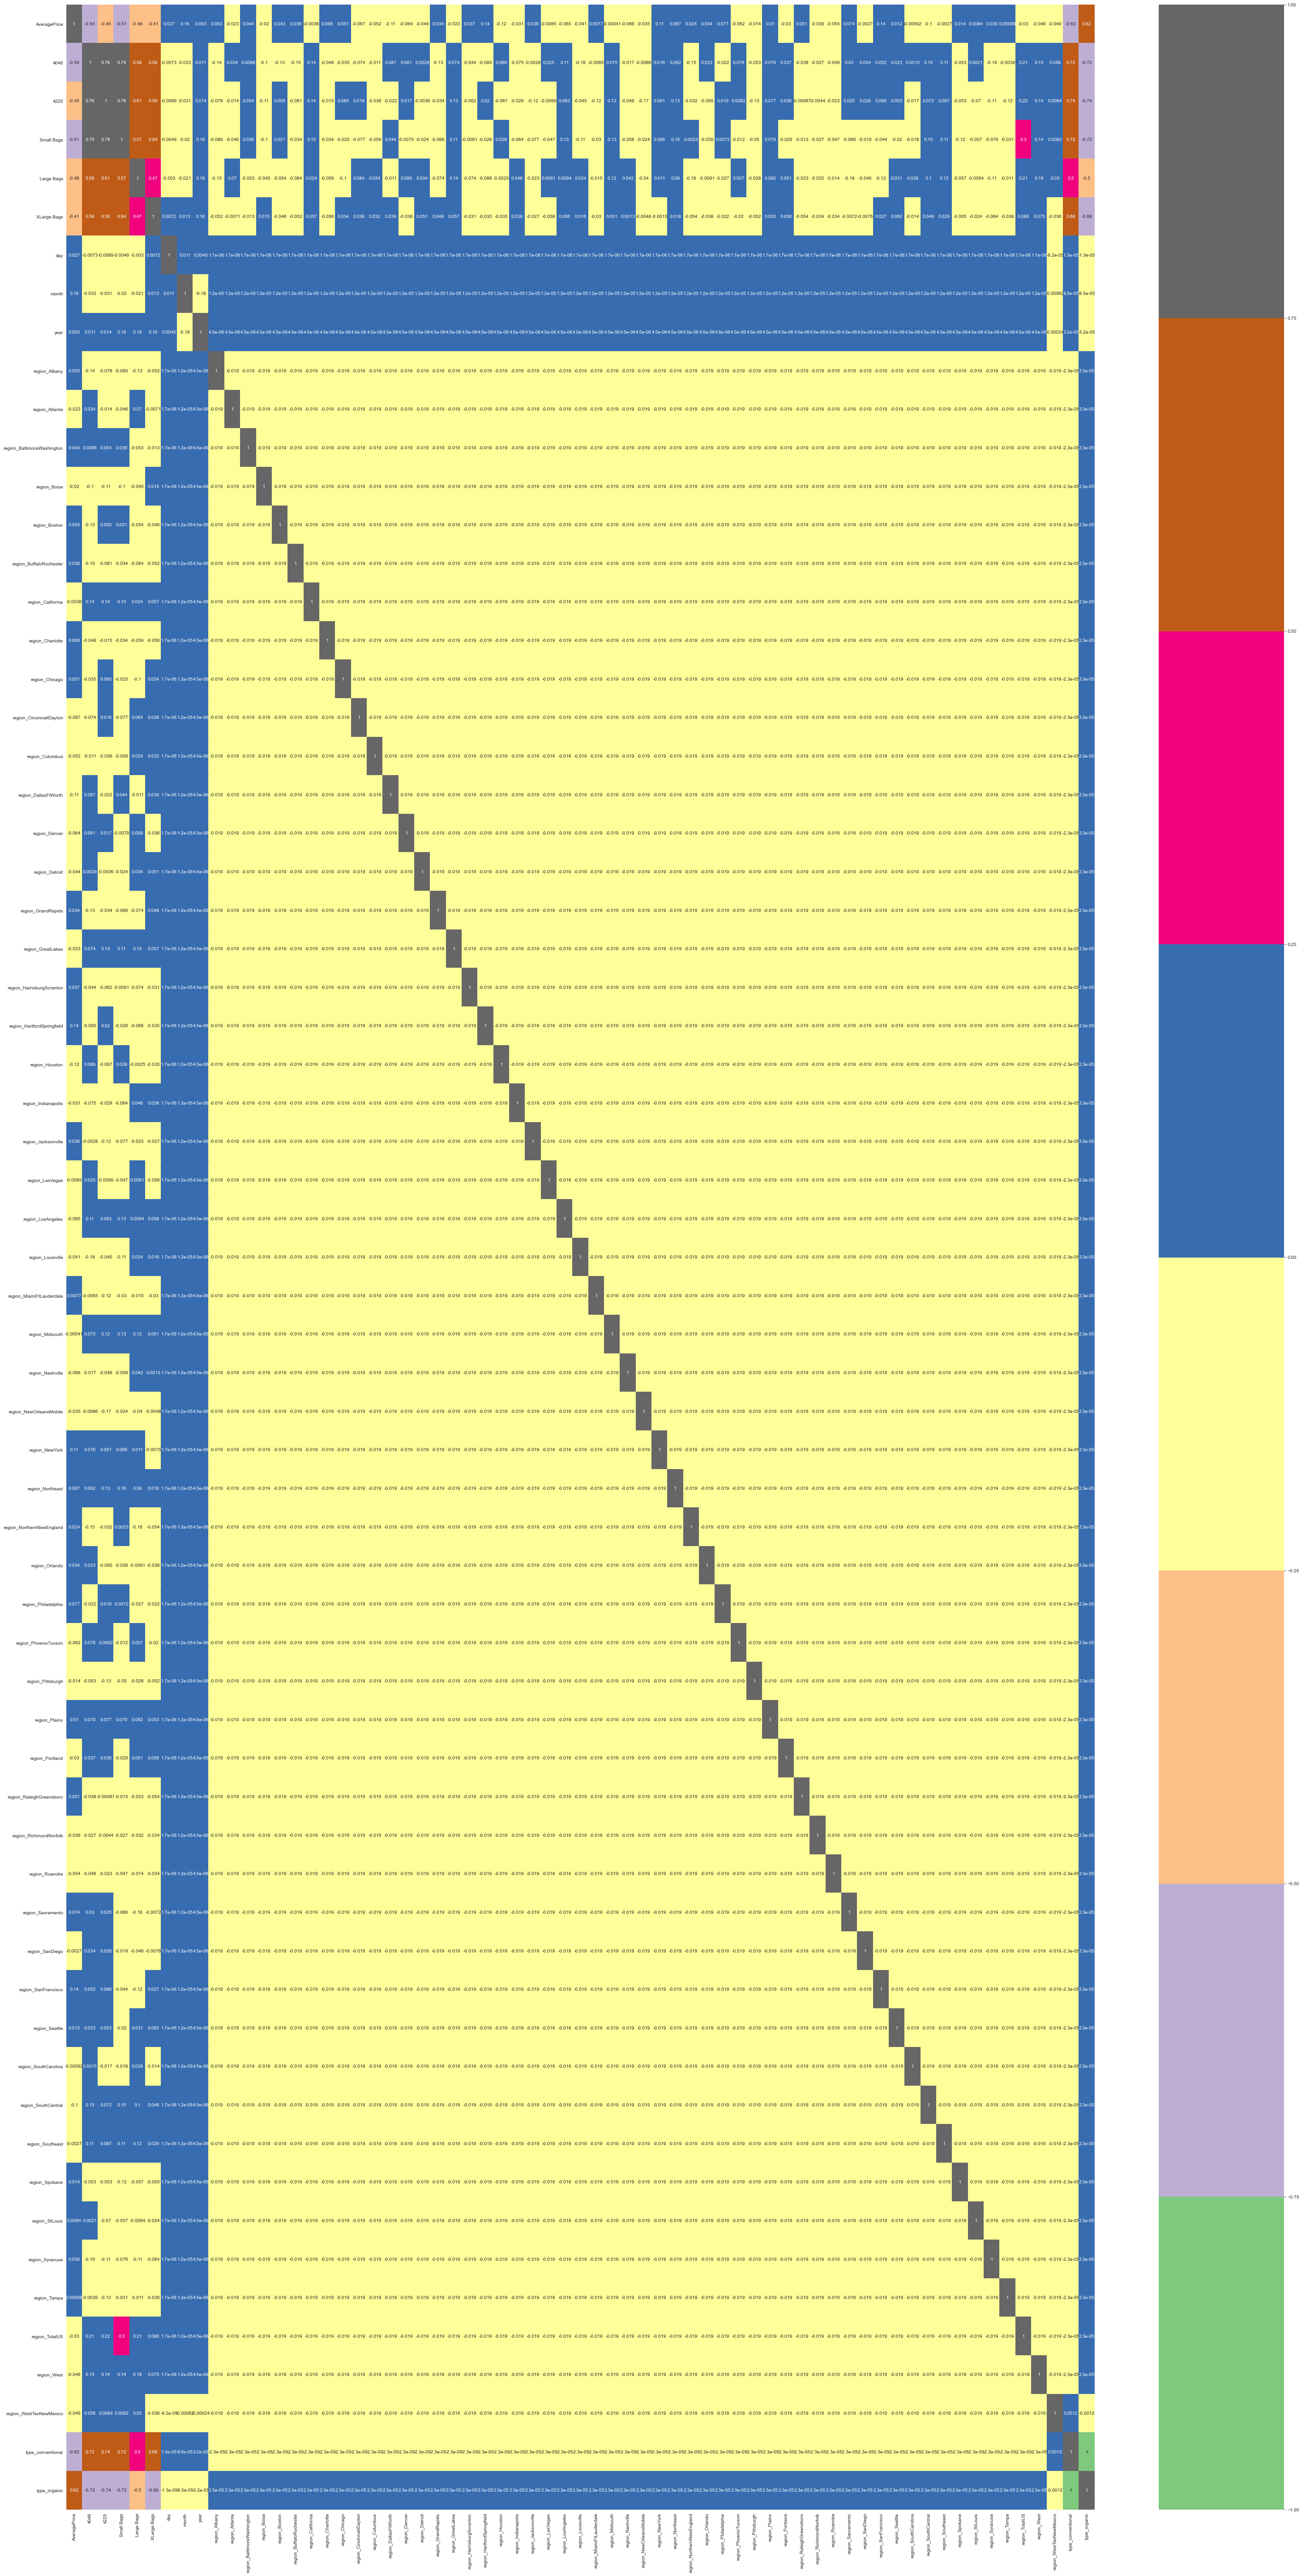

In [73]:
plt.figure(figsize=(50,100))
sns.heatmap(data_encoded.corr(),annot=True,cmap='Accent')

In [74]:
data_encoded

,AveragePrice,4046,4225,Small Bags,Large Bags,XLarge Bags,day,month,year,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_conventional,type_organic
0,1.33,6.944801,10.905146,82.084588,4.545951,0.0,27,12,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.35,6.515127,10.706381,83.712058,4.589955,0.0,20,12,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.93,6.679222,11.600485,80.866559,4.645736,0.0,13,12,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1.08,7.032624,11.184108,74.726080,4.903495,0.0,6,12,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1.28,6.848515,10.688288,75.644578,5.291746,0.0,29,11,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,7.624599,7.333154,89.830740,6.070391,0.0,4,2,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
18245,1.71,7.083975,8.141044,82.781013,5.786284,0.0,28,1,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
18246,1.87,7.084159,7.805389,83.602331,3.768384,0.0,21,1,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
18247,1.93,7.332127,8.000363,86.460256,3.931826,0.0,14,1,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


#### Scaling the dataset

In [75]:
from sklearn.preprocessing import MinMaxScaler
feature_scale=[feature for feature in data_encoded.columns if feature not in ['AveragePrice']]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_encoded[feature_scale])
scaled_data

array([[0.40996957, 0.64778557, 0.30483503, ..., 0.        , 1.        ,
        0.        ],
       [0.38460485, 0.63597861, 0.31087891, ..., 0.        , 1.        ,
        0.        ],
       [0.3942918 , 0.68908998, 0.30031167, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.41819628, 0.46365437, 0.31047142, ..., 1.        , 0.        ,
        1.        ],
       [0.43283447, 0.47523618, 0.32108481, ..., 1.        , 0.        ,
        1.        ],
       [0.47054916, 0.46126707, 0.32756455, ..., 1.        , 0.        ,
        1.        ]])

In [76]:
new_df = pd.concat([dataset[['AveragePrice']].reset_index(drop=True),
                    pd.DataFrame(scaled_data, columns=feature_scale)],
                    axis=1)

In [77]:
new_df

,AveragePrice,4046,4225,Small Bags,Large Bags,XLarge Bags,day,month,year,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_conventional,type_organic
0,1.33,0.409970,0.647786,0.304835,0.292169,0.0,0.866667,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.35,0.384605,0.635979,0.310879,0.294997,0.0,0.633333,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.93,0.394292,0.689090,0.300312,0.298582,0.0,0.400000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.08,0.415154,0.664356,0.277508,0.315148,0.0,0.166667,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.28,0.404286,0.634904,0.280919,0.340101,0.0,0.933333,0.909091,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,0.450100,0.435603,0.333602,0.390145,0.0,0.100000,0.090909,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
18245,1.71,0.418185,0.483593,0.307421,0.371885,0.0,0.900000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
18246,1.87,0.418196,0.463654,0.310471,0.242195,0.0,0.666667,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
18247,1.93,0.432834,0.475236,0.321085,0.252699,0.0,0.433333,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0

#### Splitting into dependent and independent variable

In [78]:
x = new_df.drop(['AveragePrice'],axis=1)
y = new_df['AveragePrice']

#### Train/Test Split

In [79]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=2)

### Model Building

In [80]:
#importing libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from xgboost import XGBRegressor

In [81]:
### train/ test split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)

In [82]:
LR = LinearRegression()
lasso = Lasso()
ridge = Ridge()
KNN = KNeighborsRegressor()
SV = SVR()
DTR = DecisionTreeRegressor()
RTF = RandomForestRegressor()
ADB = AdaBoostRegressor()
GB = GradientBoostingRegressor()
xgb = XGBRegressor()

In [83]:
# list of model name and instances
models = [("Linear Regression ",LR),
          ("Lasso Regressor",lasso),
          ("Ridge Regressor",ridge),
          ("K Nearest Neighbor Regressor ",KNN),
          ("Support Vector Regressor ",SV),
          ("Decision Tree Regressor ",DTR),
          ("Random forest Regressor ",RTF),
          ("AdaBoost Regressor ",ADB),
          ("Gradient Boosting Regressor ",GB),
          ("XG Boost",xgb)]

In [84]:
# loop for model training, prediction and evaluation
train_scores=[]
test_scores=[]

for name, model in models:
    print("*****",name,"*****")
    model.fit(xtrain,ytrain)
    print("\n",model)
    train_pred = model.predict(xtrain)
    test_pred = model.predict(xtest)
    
    train_acc = r2_score(ytrain,train_pred)
    test_acc = r2_score(ytest,test_pred)
    print('Train R2_score',train_acc)
    print('Test R2_score',test_acc)
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    print("******Train Errors******")
    print('MAE',mean_absolute_error(ytrain,train_pred))
    print('MSE',mean_squared_error(ytrain,train_pred))
    print('RMSE',np.sqrt(mean_squared_error(ytrain,train_pred)))
    print("******Test Errors******")
    print('MAE',mean_absolute_error(ytest,test_pred))
    print('MSE',mean_squared_error(ytest,test_pred))
    print('RMSE',np.sqrt(mean_squared_error(ytest,test_pred)),"\n")

***** Linear Regression  *****

 LinearRegression()
Train R2_score 0.6425662718658034
Test R2_score 0.6321201304633987
******Train Errors******
MAE 0.17993838959222963
MSE 0.05804836186981136
RMSE 0.24093227652145605
******Test Errors******
MAE 0.18276470679784296
MSE 0.05939414404907968
RMSE 0.2437091382141418 

***** Lasso Regressor *****

 Lasso()
Train R2_score 0.0
Test R2_score -0.0006602542389331223
******Train Errors******
MAE 0.3248315221866359
MSE 0.16240314581621523
RMSE 0.40299273667923
******Test Errors******
MAE 0.3223852148306384
MSE 0.16155643242812098
RMSE 0.40194083199909036 

***** Ridge Regressor *****

 Ridge()
Train R2_score 0.6424161193488643
Test R2_score 0.6319313042845334
******Train Errors******
MAE 0.18005685460665882
MSE 0.058072747110914494
RMSE 0.24098287721519654
******Test Errors******
MAE 0.18281895558702824
MSE 0.05942463000440497
RMSE 0.2437716759683228 

***** K Nearest Neighbor Regressor  *****

 KNeighborsRegressor()
Train R2_score 0.86647095943548

In [89]:
cross_val = []
Model = []
for name,model in models:
    print('*****',name,'*****')
    cv_=cross_val_score(model,x,y,cv=5).mean()
    Model.append(name)
    cross_val.append(cv_)
    print(cv_)

***** Linear Regression  *****
0.3486555932072576
***** Lasso Regressor *****
-1.2053134266962335
***** Ridge Regressor *****
0.35044558661811126
***** K Nearest Neighbor Regressor  *****
-0.08166784012339312
***** Support Vector Regressor  *****
0.3420152075448769
***** Decision Tree Regressor  *****
-0.09287083767487544
***** Random forest Regressor  *****
0.2885865360834992
***** AdaBoost Regressor  *****
-0.051439522367375055
***** Gradient Boosting Regressor  *****
0.3986606824267001
***** XG Boost *****
0.4722383621258065


In [90]:
evaluate = pd.DataFrame({})
evaluate['Model'] = Model
evaluate['Train r2 score']=train_scores
evaluate['Test r2 score']=test_scores
evaluate['Cross val score'] = cross_val

evaluate

,Model,Train r2 score,Test r2 score,Cross val score
0,Linear Regression,0.642566,0.632120,0.348656
1,Lasso Regressor,0.000000,-0.000660,-1.205313
2,Ridge Regressor,0.642416,0.631931,0.350446
3,K Nearest Neighbor Regressor,0.866471,0.770853,-0.081668
4,Support Vector Regressor,0.827778,0.802659,0.342015
5,Decision Tree Regressor,1.000000,0.764725,-0.092871
6,Random forest Regressor,0.985699,0.889195,0.288587
7,AdaBoost Regressor,0.558389,0.539325,-0.051440
8,Gradient Boosting Regressor,0.742856,0.720154,0.398661
9,XG Boost,0.954770,0.892144,0.472238


Since getting best accuracy for xg boost will be selecting it as the best model and will be applying hyperparameter for better prediction

### Hyperparameter Tuning

In [106]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.1, 0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators"     : [50,100,150,200]
}

In [107]:
random_search=RandomizedSearchCV(xgb,param_distributions=params,n_jobs=-1,cv=5,verbose=5)
random_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=4,
                                          num_par...
                                          reg_alpha=0, reg_lambda=1,
                                          scale_pos_weight=1, subsample=1,
   

In [108]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
random_search.best_params_

{'n_estimators': 100,
 'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.25,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [110]:
tuned_mod = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
tuned_mod.fit(xtrain,ytrain)
tuned_pred = tuned_mod.predict(xtest)
print('R2_score',r2_score(ytest,tuned_pred))
cross_val=cross_val_score(tuned_mod,x,y,scoring='r2',cv=5).mean()
print(cross_val)

R2_score 0.894262856507993
0.46084214151155384


In [113]:
### Saving the model
import joblib
joblib.dump(tuned_mod,'avocado.pkl')

['avocado.pkl']